In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pip
import json
from pprint import pprint
from pandas.io.json import json_normalize

# импорт визуальных бибилотек

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
pd.set_option('max_colwidth', 500)
pd.set_option('display.width', 500)
pd.set_option('max_rows', 300) #число строк
pd.set_option('display.max_columns', 500) #число столбцов

In [ ]:
#%%capture
#!wget https://www.dropbox.com/s/ij7yqmyf6je97x5/pm.csv?dl=0

In [ ]:
#pm = pd.read_csv('pm.csv?dl=0')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Пром. технопарки.xlsx to Пром. технопарки.xlsx


In [ ]:
pm = pd.read_excel("Пром. технопарки.xlsx")
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 431 entries, name_ru|3::parks_tech|4 to longitude|1::parks_tech|4
dtypes: float64(144), object(287)
memory usage: 323.4+ KB


In [ ]:
pm.head()

,name_ru|3::parks_tech|4,federal_ru|2::parks_tech|4,subject_ru|2::parks_tech|4,area_type_ru|2::parks_tech|4,park_type_ru|2::parks_tech|4,commissioning_date|1::parks_tech|4,accreditation_ru|2::parks_tech|4,certificate_ns_ru|2::parks_tech|4,specialization_ru|3::parks_tech|4,okved_2_ru|3::parks_tech|4,included_cluster_infrastructure_ru|2::parks_tech|4,status_ru|2::parks_tech|4,park_type_ownership_ru|2::parks_tech|4,assets_ownership_form_ru|2::parks_tech|4,head_ru|3::parks_tech|4,ownership_form_type_ru|2::parks_tech|4,head_address|3::parks_tech|4,address_ru|3::parks_tech|4,contact_full_name_ru|2::parks_tech|4,website|3::parks_tech|4,real_estate_management_ru|2::parks_tech|4,land_sales_ru|2::parks_tech|4,sale_buildings_ru|2::parks_tech|4,land_rentals_ru|2::parks_tech|4,production_sites_rentals_ru|2::parks_tech|4,production_facilities_construction_ru|2::parks_tech|4,special_equipment_provision_ru|3::parks_tech|4,additional_security_services_ru|2::parks_tech|4,private_security_services_ru|2::parks_tech|4,phone_services_ru|2::parks_tech|4,internet_services_ru|2::parks_tech|4,security_services_ru|2::parks_tech|4,logistic_services_ru|2::parks_tech|4,accounting_services_ru|2::parks_tech|4,financial_services_ru|2::parks_tech|4,staff_recruitment_ru|2::parks_tech|4,legal_services_ru|2::parks_tech|4,consulting_services_ru|2::parks_tech|4,intellectual_property_protection_ru|2::parks_tech|4,advertising_services_ru|2::parks_tech|4,provision_technological_equipment_ru|2::parks_tech|4,postal_secretarial_services_ru|2::parks_tech|4,education_services_ru|2::parks_tech|4,residents_transport_ru|2::parks_tech|4,parking_lot_services_ru|2::parks_tech|4,it_services_ru|2::parks_tech|4,catering_services_ru|2::parks_tech|4,hotel_booking_services_ru|2::parks_tech|4,shared_facilities_operations_ru|2::parks_tech|4,site_cleaning_ru|2::parks_tech|4,info_security_services_ru|2::parks_tech|4,visa_services_ru|2::parks_tech|4,residental_services_ru|2::parks_tech|4,marketing_services_ru|2::parks_tech|4,other_services_ru|3::parks_tech|4,distance_to_city|1::parks_tech|4,distance_to_regional_center|1::parks_tech|4,distance_to_moscow|1::parks_tech|4,distance_to_federal_highway|1::parks_tech|4,nearest_road_ru|2::parks_tech|4,distance_to_road|1::parks_tech|4,road_network_length|1::parks_tech|4,joining_to_railways_ru|2::parks_tech|4,railways_within_ru|2::parks_tech|4,nearest_cargo_terminal_ru|2::parks_tech|4,distance_railway_station|1::parks_tech|4,distance_to_airport|1::parks_tech|4,total_area|1::parks_tech|4,sme_area|1::parks_tech|4,available_area|1::parks_tech|4,hazard_class|2::parks_tech|4,average_price|1::parks_tech|4,average_price_sme|1::parks_tech|4,average_rental_price|1::parks_tech|4,average_rental_price_sme|1::parks_tech|4,documentation_expert_review_ru|2::parks_tech|4,right_use_land_ru|2::parks_tech|4,total_premises_area|1::parks_tech|4,existing_production_area|1::parks_tech|4,existing_production_area_sme|1::parks_tech|4,available_production_area|1::parks_tech|4,production_max_ceiling_height|1::parks_tech|4,production_average_price|1::parks_tech|4,average_cost_selling_premises|1::parks_tech|4,total_offices_area|1::parks_tech|4,free_area_office_premises|1::parks_tech|4,average_rental_cost_office|1::parks_tech|4,average_cost_selling_office|1::parks_tech|4,office_residents_real_estate_area|1::parks_tech|4,warehouse_area|1::parks_tech|4,technical_premises_area|1::parks_tech|4,business_incubator_ru|3::parks_tech|4,engineering_center_ru|3::parks_tech|4,nanotechnological_center_ru|3::parks_tech|4,shared_knowledge_scientific_center_ru|3::parks_tech|4,shared_knowledge_experimental_center_ru|3::parks_tech|4,youth_innovation_creativity_centers_ru|3::parks_tech|4,technology_transfer_ru|3::parks_tech|4,certification_center_ru|3::parks_tech|4,test_center_ru|3::parks_tech|4,metrological_service_ru|3::parks_tech|4,subcontracting_center_ru|3::parks_tech|4,vivarium_ru|3::parks_tech|4,technology_inovation_support_center_ru|3::parks_tech|4,innovation_technology_center_ru|3::parks_te

In [ ]:
pm = pm.drop(labels = [0,1,2],axis = 0)
#pm=pm.set_index('name_ru|3::parks_tech|4')

In [ ]:
pm.head(2)

,name_ru|3::parks_tech|4,federal_ru|2::parks_tech|4,subject_ru|2::parks_tech|4,area_type_ru|2::parks_tech|4,park_type_ru|2::parks_tech|4,commissioning_date|1::parks_tech|4,accreditation_ru|2::parks_tech|4,certificate_ns_ru|2::parks_tech|4,specialization_ru|3::parks_tech|4,okved_2_ru|3::parks_tech|4,included_cluster_infrastructure_ru|2::parks_tech|4,status_ru|2::parks_tech|4,park_type_ownership_ru|2::parks_tech|4,assets_ownership_form_ru|2::parks_tech|4,head_ru|3::parks_tech|4,ownership_form_type_ru|2::parks_tech|4,head_address|3::parks_tech|4,address_ru|3::parks_tech|4,contact_full_name_ru|2::parks_tech|4,website|3::parks_tech|4,real_estate_management_ru|2::parks_tech|4,land_sales_ru|2::parks_tech|4,sale_buildings_ru|2::parks_tech|4,land_rentals_ru|2::parks_tech|4,production_sites_rentals_ru|2::parks_tech|4,production_facilities_construction_ru|2::parks_tech|4,special_equipment_provision_ru|3::parks_tech|4,additional_security_services_ru|2::parks_tech|4,private_security_services_ru|2::parks_tech|4,phone_services_ru|2::parks_tech|4,internet_services_ru|2::parks_tech|4,security_services_ru|2::parks_tech|4,logistic_services_ru|2::parks_tech|4,accounting_services_ru|2::parks_tech|4,financial_services_ru|2::parks_tech|4,staff_recruitment_ru|2::parks_tech|4,legal_services_ru|2::parks_tech|4,consulting_services_ru|2::parks_tech|4,intellectual_property_protection_ru|2::parks_tech|4,advertising_services_ru|2::parks_tech|4,provision_technological_equipment_ru|2::parks_tech|4,postal_secretarial_services_ru|2::parks_tech|4,education_services_ru|2::parks_tech|4,residents_transport_ru|2::parks_tech|4,parking_lot_services_ru|2::parks_tech|4,it_services_ru|2::parks_tech|4,catering_services_ru|2::parks_tech|4,hotel_booking_services_ru|2::parks_tech|4,shared_facilities_operations_ru|2::parks_tech|4,site_cleaning_ru|2::parks_tech|4,info_security_services_ru|2::parks_tech|4,visa_services_ru|2::parks_tech|4,residental_services_ru|2::parks_tech|4,marketing_services_ru|2::parks_tech|4,other_services_ru|3::parks_tech|4,distance_to_city|1::parks_tech|4,distance_to_regional_center|1::parks_tech|4,distance_to_moscow|1::parks_tech|4,distance_to_federal_highway|1::parks_tech|4,nearest_road_ru|2::parks_tech|4,distance_to_road|1::parks_tech|4,road_network_length|1::parks_tech|4,joining_to_railways_ru|2::parks_tech|4,railways_within_ru|2::parks_tech|4,nearest_cargo_terminal_ru|2::parks_tech|4,distance_railway_station|1::parks_tech|4,distance_to_airport|1::parks_tech|4,total_area|1::parks_tech|4,sme_area|1::parks_tech|4,available_area|1::parks_tech|4,hazard_class|2::parks_tech|4,average_price|1::parks_tech|4,average_price_sme|1::parks_tech|4,average_rental_price|1::parks_tech|4,average_rental_price_sme|1::parks_tech|4,documentation_expert_review_ru|2::parks_tech|4,right_use_land_ru|2::parks_tech|4,total_premises_area|1::parks_tech|4,existing_production_area|1::parks_tech|4,existing_production_area_sme|1::parks_tech|4,available_production_area|1::parks_tech|4,production_max_ceiling_height|1::parks_tech|4,production_average_price|1::parks_tech|4,average_cost_selling_premises|1::parks_tech|4,total_offices_area|1::parks_tech|4,free_area_office_premises|1::parks_tech|4,average_rental_cost_office|1::parks_tech|4,average_cost_selling_office|1::parks_tech|4,office_residents_real_estate_area|1::parks_tech|4,warehouse_area|1::parks_tech|4,technical_premises_area|1::parks_tech|4,business_incubator_ru|3::parks_tech|4,engineering_center_ru|3::parks_tech|4,nanotechnological_center_ru|3::parks_tech|4,shared_knowledge_scientific_center_ru|3::parks_tech|4,shared_knowledge_experimental_center_ru|3::parks_tech|4,youth_innovation_creativity_centers_ru|3::parks_tech|4,technology_transfer_ru|3::parks_tech|4,certification_center_ru|3::parks_tech|4,test_center_ru|3::parks_tech|4,metrological_service_ru|3::parks_tech|4,subcontracting_center_ru|3::parks_tech|4,vivarium_ru|3::parks_tech|4,technology_inovation_support_center_ru|3::parks_tech|4,innovation_technology_center_ru|3::parks_te

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Индустриальные парки.xlsx to Индустриальные парки.xlsx


In [ ]:
ip = pd.read_excel("Индустриальные парки.xlsx")
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Columns: 302 entries, name_ru|2::parks_ind|4 to longitude|1::parks_ind|4
dtypes: float64(90), object(212)
memory usage: 741.0+ KB


In [ ]:
ip = ip.drop(labels = [0,1,2,107,212,233],axis = 0) #107, 212 - Комплекс Ниагара и Центр, ошибка в выручке, 233 - Парк Приморье, ошибка в инвестициях, нарушен порядок цифр
#ip=ip.set_index('name_ru|2::parks_ind|4')

In [ ]:
ip.head()

,name_ru|2::parks_ind|4,federal_ru|2::parks_ind|4,subject_ru|2::parks_ind|4,area_type_ru|2::parks_ind|4,park_type_ru|2::parks_ind|4,year_creation_ind_park|1::parks_ind|4,description_year_creation_park|3::parks_ind|4,included_in_register_minpromtorg_ru|2::parks_ind|4,certificate_aip_ru|2::parks_ind|4,certificate_ns_ru|2::parks_ind|4,specialization_ru|3::parks_ind|4,okved_2_ru|3::parks_ind|4,included_cluster_infrastructure_ru|2::parks_ind|4,status_ru|2::parks_ind|4,ownership_form_type_ru|2::parks_ind|4,assets_ownership_form_ru|2::parks_ind|4,head_ru|3::parks_ind|4,head_ownership_form_ru|2::parks_ind|4,head_address|3::parks_ind|4,head_tin|2::parks_ind|4,address_ru|3::parks_ind|4,real_estate_management_ru|2::parks_ind|4,land_sales_ru|2::parks_ind|4,sale_buildings_ru|2::parks_ind|4,land_rentals_ru|2::parks_ind|4,production_sites_rentals_ru|2::parks_ind|4,production_facilities_construction_ru|3::parks_ind|4,special_equipment_provision_ru|3::parks_ind|4,additional_security_services_ru|2::parks_ind|4,private_security_services_ru|2::parks_ind|4,phone_services_ru|2::parks_ind|4,internet_services_ru|2::parks_ind|4,security_services_ru|2::parks_ind|4,logistic_services_ru|2::parks_ind|4,accounting_services_ru|2::parks_ind|4,financial_services_ru|2::parks_ind|4,staff_recruitment_ru|2::parks_ind|4,legal_services_ru|2::parks_ind|4,consulting_services_ru|2::parks_ind|4,shared_facilities_operations_ru|2::parks_ind|4,advertising_services_ru|2::parks_ind|4,postal_secretarial_services_ru|2::parks_ind|4,educational_services_ru|2::parks_ind|4,residents_transport_ru|2::parks_ind|4,parking_lot_services_ru|2::parks_ind|4,it_services_ru|2::parks_ind|4,catering_services_ru|2::parks_ind|4,common_facilities_ru|2::parks_ind|4,site_cleaning_ru|2::parks_ind|4,other_services_ru|3::parks_ind|4,distance_to_city|1::parks_ind|4,distance_to_regional_center|1::parks_ind|4,distance_to_moscow|1::parks_ind|4,distance_to_federal_highway|1::parks_ind|4,nearest_road_ru|3::parks_ind|4,distance_to_road|1::parks_ind|4,road_network_length|1::parks_ind|4,joining_to_railways_ru|2::parks_ind|4,railways_within_ru|2::parks_ind|4,nearest_cargo_terminal_ru|3::parks_ind|4,distance_railway_station|1::parks_ind|4,distance_to_cargo_terminal|1::parks_ind|4,distance_to_airport|1::parks_ind|4,total_area|1::parks_ind|4,sme_area|1::parks_ind|4,available_area|1::parks_ind|4,hazard_class|2::parks_ind|4,average_price|1::parks_ind|4,average_price_sme|1::parks_ind|4,average_rental_price|1::parks_ind|4,average_rental_price_sme|1::parks_ind|4,documentation_expert_review_ru|2::parks_ind|4,right_use_land_ru|2::parks_ind|4,total_area_premises|1::parks_ind|4,existing_production_area|1::parks_ind|4,existing_production_area_sme|3::parks_ind|4,available_production_area|1::parks_ind|4,production_max_ceiling_height|1::parks_ind|4,production_average_price|1::parks_ind|4,average_cost_selling_premises|1::parks_ind|4,total_offices_area|1::parks_ind|4,free_area_office_premises|1::parks_ind|4,average_rental_cost_office|1::parks_ind|4,average_cost_selling_office|1::parks_ind|4,warehouse_area|1::parks_ind|4,technical_premises_area|1::parks_ind|4,electricity_supply_ru|2::parks_ind|4,electrical_capacity|1::parks_ind|4,available_electrical_capacity|1::parks_ind|4,electricity_source|3::parks_ind|4,electricity_connection_cost|1::parks_ind|4,average_tariff_electricity|1::parks_ind|4,heating_supply_ru|2::parks_ind|4,heating_capacity|1::parks_ind|4,available_heating_capacity|1::parks_ind|4,heating_source_ru|2::parks_ind|4,heat_medium_ru|2::parks_ind|4,average_tariff_heat|1::parks_ind|4,gas_supply_ru|2::parks_ind|4,gas_capacity|1::parks_ind|4,available_gas_capacity|1::parks_ind|4,average_tariff_gas|1::parks_ind|4,water_supply_ru|2::parks_ind|4,incl_hvs_ru|2::parks_ind|4,incl_dhw_ru|2::parks_ind|4,incl_industrial_water_ru|2::parks_ind|4,incl_water_fire_ru|2::parks_ind|4,water_capacity|1::parks_ind|4,available_water_capacity|1::parks_ind|4,water_source_ru|2::parks_ind|4,average_tariff_water|1::parks_ind|4,sewage_ru|2::parks_i

***1) Расположени индустриальных парков и промышленных технопарков на карте***

In [ ]:
#@title
# создаем новые df с наименованием и координатами
pm_c=pm[['name_ru|3::parks_tech|4', 'latitude|1::parks_tech|4', 'longitude|1::parks_tech|4']]
ip_c=ip[['name_ru|2::parks_ind|4', 'latitude|1::parks_ind|4', 'longitude|1::parks_ind|4']]

# переименовывыем столбцы
pm_c=pm_c.rename(columns={'name_ru|3::parks_tech|4':'name', 'latitude|1::parks_tech|4':'lat', 'longitude|1::parks_tech|4':'long'})
ip_c=ip_c.rename(columns={'name_ru|2::parks_ind|4':'name', 'latitude|1::parks_ind|4':'lat', 'longitude|1::parks_ind|4':'long'})

pm_ip_c=pd.concat([pm_c, ip_c], sort=False) # соеденить столбцы df 

pm_ip_c = pm_ip_c.drop(labels = 3, axis = 0) # удаляем строку 3

In [ ]:
#@title
fig = go.Figure(go.Scattermapbox(lat=pm_ip_c['lat'], lon=pm_ip_c['long'], text=pm_ip_c['name']))
map_center = go.layout.mapbox.Center(lat=(pm_ip_c['lat'].max()+pm_ip_c['lat'].min())/2, 
                                     lon=(pm_ip_c['long'].max()+pm_ip_c['long'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

***2) Распределение парков по типу***

In [ ]:
#@title
pm_type=pm[['name_ru|3::parks_tech|4', 'park_type_ru|2::parks_tech|4']]
ip_type=ip[['name_ru|2::parks_ind|4', 'park_type_ru|2::parks_ind|4']]
pm_type=pm_type.rename(columns={'name_ru|3::parks_tech|4':'name', 'park_type_ru|2::parks_tech|4':'type'})
ip_type=ip_type.rename(columns={'name_ru|2::parks_ind|4':'name', 'park_type_ru|2::parks_ind|4':'type'})
#pm_ip_type=pd.concat([pm_type, ip_type], sort=False)
pm_type=pm_type.drop(labels = 3, axis = 0)
ip_type=ip_type.drop(labels = 3, axis = 0)

In [ ]:
#@title
values = pm_type.groupby('type').size().values
labels = pm_type.groupby('type').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Распределение промышленных технопарков по типу",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

In [ ]:
#@title
values = ip_type.groupby('type').size().values
labels = ip_type.groupby('type').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Распределение индустриальных парков по типу",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

***3) Распределение парков по специализации***

In [ ]:
#@title
pm_spec=pm[['name_ru|3::parks_tech|4', 'specialization_ru|3::parks_tech|4']]
ip_spec=ip[['name_ru|2::parks_ind|4', 'specialization_ru|3::parks_ind|4']]
pm_spec=pm_spec.rename(columns={'name_ru|3::parks_tech|4':'name', 'specialization_ru|3::parks_tech|4':'spec'})
ip_spec=ip_spec.rename(columns={'name_ru|2::parks_ind|4':'name', 'specialization_ru|3::parks_ind|4':'spec'})
pm_ip_spec=pd.concat([pm_spec, ip_spec], sort=False)
pm_ip_spec=pm_ip_spec.drop(labels = 3, axis = 0)

In [ ]:
#@title
values = pm_ip_spec.groupby('spec').size().values
labels = pm_ip_spec.groupby('spec').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Распределение парков по специализации",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

***4) Соответствие отраслевому ГОСТ***

In [ ]:
#@title
pm_sert=pm[['name_ru|3::parks_tech|4', 'certificate_ns_ru|2::parks_tech|4']]
ip_sert=ip[['name_ru|2::parks_ind|4', 'certificate_ns_ru|2::parks_ind|4']]
pm_sert=pm_sert.rename(columns={'name_ru|3::parks_tech|4':'name', 'certificate_ns_ru|2::parks_tech|4':'sert'})
ip_sert=ip_sert.rename(columns={'name_ru|2::parks_ind|4':'name', 'certificate_ns_ru|2::parks_ind|4':'sert'})
pm_sert=pm_sert.drop(labels = 3, axis = 0)
ip_sert=ip_sert.drop(labels = 3, axis = 0)
#pm_ip_sert=pd.concat([pm_sert, ip_sert], sort=False)
#pm_ip_sert=pm_ip_sert.drop(labels = 3, axis = 0)

In [ ]:
#@title
values = pm_sert.groupby('sert').size().values
labels = pm_sert.groupby('sert').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Соответствие промышленных технопарков отраслевому ГОСТ",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

In [ ]:
#@title
values = ip_sert.groupby('sert').size().values
labels = ip_sert.groupby('sert').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Соответствие индустриальных парков отраслевому ГОСТ",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

***5) Тип парка по форме собственности***

In [ ]:
#@title
pm_own=pm[['name_ru|3::parks_tech|4', 'park_type_ownership_ru|2::parks_tech|4']]
ip_own=ip[['name_ru|2::parks_ind|4', 'ownership_form_type_ru|2::parks_ind|4']]
pm_own=pm_own.rename(columns={'name_ru|3::parks_tech|4':'name', 'park_type_ownership_ru|2::parks_tech|4':'own'})
ip_own=ip_own.rename(columns={'name_ru|2::parks_ind|4':'name', 'ownership_form_type_ru|2::parks_ind|4':'own'})
pm_ip_own=pd.concat([pm_own, ip_own], sort=False)
pm_ip_own=pm_ip_own.drop(labels = 3, axis = 0)

In [ ]:
#@title
# нормализуем и заменяем ошибки при внесении информации в реестр, относительно типа собтвенности

pm_ip_own['own'].replace(['частная', 'частный', 'Частный', 'Частный промышленный технопарк', 'АО', 'частная собственность', 'собственность'],'Частная',inplace=True)
pm_ip_own['own'].replace(['государственный', 'государственная', 'Государственное Автономное Учреждение', 'Федеральный', 'Государственный', 'Региональная', 'Муниципальная', 'Муниципальная форма собственности', 'Государственная в лице ГК "Росатом"'],'Государственная',inplace=True)
pm_ip_own['own'].replace(['государственно-частное партнерство', 'смешанная', 'Частно-государственный'],'Частная',inplace=True)

In [ ]:
#@title
values = pm_ip_own.groupby('own').size().values
labels = pm_ip_own.groupby('own').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Тип парка по форме собственности",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

***6) Площадь территории парков (га)***

In [ ]:
#@title

pm_ar=pm[['name_ru|3::parks_tech|4', 'total_area|1::parks_tech|4', 'available_area|1::parks_tech|4']]
ip_ar=ip[['name_ru|2::parks_ind|4', 'total_area|1::parks_ind|4', 'available_area|1::parks_ind|4']]
pm_ar=pm_ar.rename(columns={'name_ru|3::parks_tech|4':'name', 'total_area|1::parks_tech|4':'area', 'available_area|1::parks_tech|4':'free'})
ip_ar=ip_ar.rename(columns={'name_ru|2::parks_ind|4':'name', 'total_area|1::parks_ind|4':'area', 'available_area|1::parks_ind|4':'free'})
pm_ip_ar=pd.concat([pm_ar, ip_ar], sort=False)
pm_ip_ar=pm_ip_ar.drop(labels = 3, axis = 0)
pm_ip_ar['area'] = pd.to_numeric(pm_ip_ar['area']) # присвоить всем объектам тип float64
pm_ip_ar['free'] = pd.to_numeric(pm_ip_ar['free']) # присвоить всем объектам тип float64

In [ ]:
#@title
pm_ip_ar.head(3)
pm_ip_ar.sort_values('free', axis=0, ascending=False)

,name,area,free
127,"ООО ""Агропромышленный парк К-Агро""",2410.00,2396.00
73,Индустриальный парк Узловая,2165.90,1925.12
172,Шексна,2000.00,1422.00
63,VICTORIA INDUSTRIAL PARK,1500.00,1050.00
189,Черняховск,988.00,980.40
...,...,...,...
24,М4,81.00,0.00
32,ПромЦентр,13.62,0.00
4,Технопарк Республики Мордовия,8.70,0.00
89,Волоконовский,12.80,NaN


In [ ]:
#@title

print('Cредняя площадь территории парка', round(float(pm_ip_ar.area.mean())), 'га')
print('Общая площадь территории парков составляет', round(float(pm_ip_ar.area.sum())), 'га')
print('Минимальная площадь территории парка составляет', round(float(pm_ip_ar.area.min())), 'га')
print('Максимальная площадь территории парка составляет', round(float(pm_ip_ar.area.max())), 'га')

Cредняя площадь территории парка 129 га
Общая площадь территории парков составляет 51629 га
Минимальная площадь территории парка составляет 0 га
Максимальная площадь территории парка составляет 2410 га


In [ ]:
#@title

print('Cредняя свободная площадь территории парка', round(float(pm_ip_ar.free.mean())), 'га')
print('Общая свободная площадь территории парков составляет', round(float(pm_ip_ar.free.sum())), 'га')
print('Минимальная свободная площадь территории парка составляет', round(float(pm_ip_ar.free.min())), 'га')
print('Максимальная свободная площадь территории парка составляет', round(float(pm_ip_ar.free.max())), 'га')

Cредняя свободная площадь территории парка 65 га
Общая свободная площадь территории парков составляет 25644 га
Минимальная свободная площадь территории парка составляет 0 га
Максимальная свободная площадь территории парка составляет 2396 га


Text(0.5, 1.0, 'Распределение площади парков')

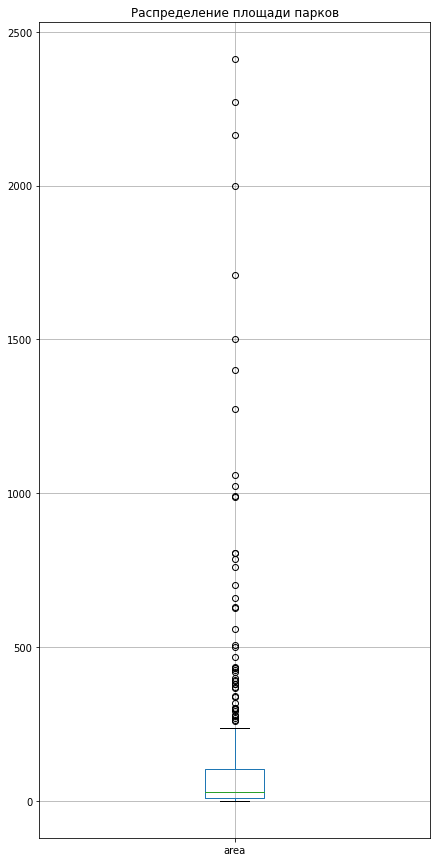

In [ ]:
#@title
plt.figure(figsize=(7,15))
pm_ip_ar.boxplot('area').set_title('Распределение площади парков')

In [ ]:
#@title
S_F = [{"type": 'Передано резидентам', "area": 51702-25676}, {"type": 'Свободно', "area": 25676}]
df_S_F = pd.DataFrame(S_F)
#print(df_S_F)

values = df_S_F.area
labels = df_S_F.type

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Использование площади парков",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

***7) Площадь помещений парков (м кв)***

In [ ]:
#@title
pm_im=pm[['name_ru|3::parks_tech|4', 'total_premises_area|1::parks_tech|4', 'existing_production_area|1::parks_tech|4', 'available_production_area|1::parks_tech|4',
          'total_offices_area|1::parks_tech|4', 'free_area_office_premises|1::parks_tech|4', 'warehouse_area|1::parks_tech|4', 'technical_premises_area|1::parks_tech|4']] #имя, общая, общая произв, своб произв, общ оф, своб оф, склад, техн
ip_im=ip[['name_ru|2::parks_ind|4', 'total_area_premises|1::parks_ind|4', 'existing_production_area|1::parks_ind|4', 'available_production_area|1::parks_ind|4', 
          'total_offices_area|1::parks_ind|4', 'free_area_office_premises|1::parks_ind|4', 'warehouse_area|1::parks_ind|4', 'technical_premises_area|1::parks_ind|4']]

pm_im=pm_im.rename(columns={'name_ru|3::parks_tech|4':'name', 'total_premises_area|1::parks_tech|4':'total', 'existing_production_area|1::parks_tech|4':'total_prom', 'available_production_area|1::parks_tech|4':'free_prom',
                            'total_offices_area|1::parks_tech|4':'total_off', 'free_area_office_premises|1::parks_tech|4':'free_off', 'warehouse_area|1::parks_tech|4':'warehouse',
                            'technical_premises_area|1::parks_tech|4':'tech'})
ip_im=ip_im.rename(columns={'name_ru|2::parks_ind|4':'name', 'total_area_premises|1::parks_ind|4':'total', 'existing_production_area|1::parks_ind|4':'total_prom', 'available_production_area|1::parks_ind|4':'free_prom', 
                            'total_offices_area|1::parks_ind|4':'total_off', 'free_area_office_premises|1::parks_ind|4':'free_off', 'warehouse_area|1::parks_ind|4':'warehouse',
                            'technical_premises_area|1::parks_ind|4':'tech'})
pm_ip_im=pd.concat([pm_im, ip_im], sort=False)
pm_ip_im=pm_ip_im.drop(labels = 3, axis = 0)
#pm_ip_im.head(2)

#pm_ip_im['total'] = pd.to_numeric(pm_ip_im['total'])

#pm_ip_ar['area'] = pd.to_numeric(pm_ip_ar['area']) # присвоить всем объектам тип float64
#pm_ip_ar['free'] = pd.to_numeric(pm_ip_ar['free']) # присвоить всем объектам тип float64

In [ ]:
pm_ip_im
pm_ip_im.sort_values('total_off', axis=0, ascending=False)

,name,total,total_prom,free_prom,total_off,free_off,warehouse,tech
36,КИП Мастер,1.50845e+06,1261192,0,162940,0,0,0
108,Рождество,935000,840000,830000,95000,94000,NaN,NaN
173,"Акционерное Общество ""Индустриальный парк ""Ока-Полимер""",210000,170000,90000,40000,34000,NaN,NaN
178,"Индустриальный парк АО ""АВТОВАЗ""",150000,114000,40000,36000,20000,NaN,NaN
16,Жигулевская долина,65260.3,2900,0,34198,5841.8,NaN,15341.2
...,...,...,...,...,...,...,...,...
305,"ИП ""Курсаково""",1000,500,500,NaN,200,NaN,NaN
308,НогайПром,0,0,0,NaN,0,NaN,NaN
309,"Индустриальный (промышленный) парк ""Аврора""",0,0,0,NaN,0,NaN,NaN
310,КОМПОЗИТ,201600,96600,96600,NaN,20000,105000,NaN


***7.1) СВОДНЫЕ ДАННЫЕ ПО ПРОМТЕХНОПАРКАМ И ИНДУСТРИАЛЬНЫМ ПАРКАМ***

In [ ]:
#@title
print('СВОДНАЯ СТАТИСТИКА ПО ПТ+ИП')

print('Общая площадь помещений парков составляет', round(float(pm_ip_im.total.sum())), 'м.кв')
print('Средняя площадь помещений парка составляет', round(float(pm_ip_im.total.mean())), 'м.кв')
print('Максимальная площадь помещений парка составляет', round(float(pm_ip_im.total.max())), 'м.кв')
print('Минимальная площадь помещений парка составляет', round(float(pm_ip_im.total.min())), 'м.кв')
print('Общая площадь *свободных* помещений парков составляет', round(float(pm_ip_im.free_prom.sum()+pm_ip_im.free_off.sum())), 'м.кв')
print('Общая площадь производственных помещений парков составляет', round(float(pm_ip_im.total_prom.sum())), 'м.кв')
print('Максимальная площадь производственных помещений парка составляет', round(float(pm_ip_im.total_prom.max())), 'м.кв')
print('Общая площадь *свободных* производственных помещений парков составляет', round(float(pm_ip_im.free_prom.sum())), 'м.кв')
print('Общая площадь офисных помещений парков составляет', round(float(pm_ip_im.total_off.sum())), 'м.кв')
print('Общая площадь *свободных* офисных помещений парков составляет', round(float(pm_ip_im.free_off.sum())), 'м.кв')
print('Общая площадь складских помещений парков составляет', round(float(pm_ip_im.warehouse.sum())), 'м.кв')
print('Общая площадь технических помещений парков составляет', round(float(pm_ip_im.tech.sum())), 'м.кв')

СВОДНАЯ СТАТИСТИКА ПО ПТ+ИП
Общая площадь помещений парков составляет 19558257 м.кв
Средняя площадь помещений парка составляет 54328 м.кв
Максимальная площадь помещений парка составляет 1520250 м.кв
Минимальная площадь помещений парка составляет 0 м.кв
Общая площадь *свободных* помещений парков составляет 6410556 м.кв
Общая площадь производственных помещений парков составляет 14509815 м.кв
Максимальная площадь производственных помещений парка составляет 1261192 м.кв
Общая площадь *свободных* производственных помещений парков составляет 5712854 м.кв
Общая площадь офисных помещений парков составляет 1396833 м.кв
Общая площадь *свободных* офисных помещений парков составляет 697702 м.кв
Общая площадь складских помещений парков составляет 879746 м.кв
Общая площадь технических помещений парков составляет 410798 м.кв


***7.2) ДАННЫЕ ПО ПРОМТЕХНОПАРКАМ***

In [ ]:
#@title
print('ДАННЫЕ ПО ПРОМЫШЛЕННЫМ ТЕХНОПАРКАМ')

pm_im=pm_im.drop(labels = 3, axis = 0)
print('Общая площадь помещений парков составляет', round(float(pm_im.total.sum())), 'м.кв')
print('Средняя площадь помещений парка составляет', round(float(pm_im.total.mean())), 'м.кв')
print('Максимальная площадь помещений парка составляет', round(float(pm_im.total.max())), 'м.кв')
print('Минимальная площадь помещений парка составляет', round(float(pm_im.total.min())), 'м.кв')
print('Общая площадь *свободных* помещений парков составляет', round(float(pm_im.free_prom.sum()+pm_im.free_off.sum())), 'м.кв')
print('Общая площадь производственных помещений парков составляет', round(float(pm_im.total_prom.sum())), 'м.кв')
print('Максимальная площадь производственных помещений парка составляет', round(float(pm_im.total_prom.max())), 'м.кв')
print('Общая площадь *свободных* производственных помещений парков составляет', round(float(pm_im.free_prom.sum())), 'м.кв')
print('Общая площадь офисных помещений парков составляет', round(float(pm_im.total_off.sum())), 'м.кв')
print('Общая площадь *свободных* офисных помещений парков составляет', round(float(pm_im.free_off.sum())), 'м.кв')
print('Общая площадь складских помещений парков составляет', round(float(pm_im.warehouse.sum())), 'м.кв')
print('Общая площадь технических помещений парков составляет', round(float(pm_im.tech.sum())), 'м.кв')

ДАННЫЕ ПО ПРОМЫШЛЕННЫМ ТЕХНОПАРКАМ
Общая площадь помещений парков составляет 3434550 м.кв
Средняя площадь помещений парка составляет 37742 м.кв
Максимальная площадь помещений парка составляет 402647 м.кв
Минимальная площадь помещений парка составляет 0 м.кв
Общая площадь *свободных* помещений парков составляет 749520 м.кв
Общая площадь производственных помещений парков составляет 1840662 м.кв
Максимальная площадь производственных помещений парка составляет 239672 м.кв
Общая площадь *свободных* производственных помещений парков составляет 609427 м.кв
Общая площадь офисных помещений парков составляет 429115 м.кв
Общая площадь *свободных* офисных помещений парков составляет 140093 м.кв
Общая площадь складских помещений парков составляет 317882 м.кв
Общая площадь технических помещений парков составляет 298215 м.кв


***7.3) ДАННЫЕ ПО ИНДУСТРИАЛЬНЫМ ПАРКАМ***

In [ ]:
#@title
print('ДАННЫЕ ПО ИНДУСТРИАЛЬНЫМ ПАРКАМ')

ip_im=ip_im.drop(labels = 3, axis = 0)
print('Общая площадь помещений парков составляет', round(float(ip_im.total.sum())), 'м.кв')
print('Средняя площадь помещений парка составляет', round(float(ip_im.total.mean())), 'м.кв')
print('Максимальная площадь помещений парка составляет', round(float(ip_im.total.max())), 'м.кв')
print('Минимальная площадь помещений парка составляет', round(float(ip_im.total.min())), 'м.кв')
print('Общая площадь *свободных* помещений парков составляет', round(float(ip_im.free_prom.sum()+ip_im.free_off.sum())), 'м.кв')
print('Общая площадь производственных помещений парков составляет', round(float(ip_im.total_prom.sum())), 'м.кв')
print('Максимальная площадь производственных помещений парка составляет', round(float(ip_im.total_prom.max())), 'м.кв')
print('Общая площадь *свободных* производственных помещений парков составляет', round(float(ip_im.free_prom.sum())), 'м.кв')
print('Общая площадь офисных помещений парков составляет', round(float(ip_im.total_off.sum())), 'м.кв')
print('Общая площадь *свободных* офисных помещений парков составляет', round(float(ip_im.free_off.sum())), 'м.кв')
print('Общая площадь складских помещений парков составляет', round(float(ip_im.warehouse.sum())), 'м.кв')
print('Общая площадь технических помещений парков составляет', round(float(ip_im.tech.sum())), 'м.кв')

ДАННЫЕ ПО ИНДУСТРИАЛЬНЫМ ПАРКАМ
Общая площадь помещений парков составляет 16123706 м.кв
Средняя площадь помещений парка составляет 59939 м.кв
Максимальная площадь помещений парка составляет 1520250 м.кв
Минимальная площадь помещений парка составляет 0 м.кв
Общая площадь *свободных* помещений парков составляет 5661036 м.кв
Общая площадь производственных помещений парков составляет 12669153 м.кв
Максимальная площадь производственных помещений парка составляет 1261192 м.кв
Общая площадь *свободных* производственных помещений парков составляет 5103427 м.кв
Общая площадь офисных помещений парков составляет 967718 м.кв
Общая площадь *свободных* офисных помещений парков составляет 557609 м.кв
Общая площадь складских помещений парков составляет 561864 м.кв
Общая площадь технических помещений парков составляет 112583 м.кв


***7.4) Общая площадь помещений***

In [ ]:
#@title
resident_pm=round(float(pm_im.total.sum()))-round(float(pm_im.free_prom.sum()+pm_im.free_off.sum()))-round(float(pm_im.warehouse.sum()))-round(float(pm_im.tech.sum()))
resident_ip=round(float(ip_im.total.sum()))-round(float(ip_im.free_prom.sum()+ip_im.free_off.sum()))-round(float(ip_im.warehouse.sum()))-round(float(ip_im.tech.sum()))
df_s_ob = pd.DataFrame({'Тип площади': ['Общая площадь', 'Общая площадь', 'Площадь занятая резидентами', 'Площадь занятая резидентами', 'Свободная площадь', 'Свободная площадь', 'Площадь складов', 'Площадь складов', 'Технические помещения', 'Технические помещения'],
                        'Тип объекта': ['Промышленный технопарк', 'Индустриальный парк', 'Промышленный технопарк', 'Индустриальный парк', 'Промышленный технопарк', 'Индустриальный парк', 'Промышленный технопарк', 'Индустриальный парк', 'Промышленный технопарк', 'Индустриальный парк'],
                       'Площадь, м.кв.': [round(float(pm_im.total.sum())), round(float(ip_im.total.sum())), resident_pm, resident_ip, round(float(pm_im.free_prom.sum()+pm_im.free_off.sum())), round(float(ip_im.free_prom.sum()+ip_im.free_off.sum())),  
                                          round(float(pm_im.warehouse.sum())), round(float(ip_im.warehouse.sum())), round(float(pm_im.tech.sum())), round(float(ip_im.tech.sum()))]})
#df_s_ob

In [ ]:
#@title
s_ob_1 = [{"type": 'Площадь помещений, занятая резидентами', "area": resident_pm+resident_ip}, 
             {"type": 'Свободная площадь помещений', "area": round(float(pm_im.free_prom.sum()+pm_im.free_off.sum()))+round(float(ip_im.free_prom.sum()+ip_im.free_off.sum()))},
             {"type": 'Площадь складов', "area": round(float(pm_im.warehouse.sum()))+round(float(ip_im.warehouse.sum()))},
             {"type": 'Площадь технических помещений', "area":round(float(pm_im.tech.sum()))+round(float(ip_im.tech.sum()))}]
df_s_ob_1 = pd.DataFrame(s_ob_1)

values = df_s_ob_1.area
labels = df_s_ob_1.type

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Общая площадь помещений индустриальных парков и промышленных технопарков",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
print('Общая площадь помещений индустриальных парков и промышленных технопарков составляет', round(float(pm_ip_im.total.sum())), 'м.кв')
print('Средняя площадь помещений парка составляет', round(float(pm_ip_im.total.mean())), 'м.кв')
print('Максимальная площадь помещений парка составляет', round(float(pm_ip_im.total.max())), 'м.кв')
print( )
fig.show()

Общая площадь помещений индустриальных парков и промышленных технопарков составляет 19558257 м.кв
Средняя площадь помещений парка составляет 54328 м.кв
Максимальная площадь помещений парка составляет 1520250 м.кв



In [ ]:
#@title
import plotly.express as px
fig = px.bar(df_s_ob, x="Тип площади", y="Площадь, м.кв.", color="Тип объекта", title="Long-Form Input")
fig.show()

***7.5) Использование производственных помещений***

In [ ]:
#@title
prom_s = [{"type": 'Площадь промпомещений промышленных технопарков, занятая резидентами', "area": round(float(pm_im.total_prom.sum()))-round(float(pm_im.free_prom.sum()))},
          {"type": 'Площадь промпомещений индустриальных парков, занятая резидентами', "area": round(float(ip_im.total_prom.sum()))-round(float(ip_im.free_prom.sum()))},
          {"type": 'Площадь промпомещений промышленных технопарков, свободная', "area": round(float(pm_im.free_prom.sum()))},
          {"type": 'Площадь промпомещений индустриальных парков, свободная', "area": round(float(ip_im.free_prom.sum()))}]
df_prom_s = pd.DataFrame(prom_s)

values = df_prom_s.area
labels = df_prom_s.type

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Использование производственных помещений индустриальных парков и промышленных технопарков",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="left", orientation="h"))
print('Общая площадь производственных помещений парков составляет', round(float(pm_ip_im.total_prom.sum())), 'м.кв')
print('Средняя площадь производственных помещений парка составляет', round(float(pm_ip_im.total_prom.mean())), 'м.кв')
print('Максимальная площадь производственных помещений парка составляет', round(float(pm_ip_im.total_prom.max())), 'м.кв')
print( )
fig.show()

Общая площадь производственных помещений парков составляет 14509815 м.кв
Средняя площадь производственных помещений парка составляет 37885 м.кв
Максимальная площадь производственных помещений парка составляет 1261192 м.кв



***7.6) Использование офисных помещений***

In [ ]:
#@title
off_s = [{"type": 'Площадь офисов промышленных технопарков, занятая резидентами', "area": round(float(pm_im.total_off.sum()))-round(float(pm_im.free_off.sum()))},
          {"type": 'Площадь офисов индустриальных парков, занятая резидентами', "area": round(float(ip_im.total_off.sum()))-round(float(ip_im.free_off.sum()))},
          {"type": 'Площадь офисов промышленных технопарков, свободная', "area": round(float(pm_im.free_off.sum()))},
          {"type": 'Площадь офисов индустриальных парков, свободная', "area": round(float(ip_im.free_off.sum()))}]
df_off_s = pd.DataFrame(off_s)

values = df_off_s.area
labels = df_off_s.type

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    title="Использование офисных помещений индустриальных парков и промышленных технопарков",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="left", orientation="h"))
print('Общая площадь офисных помещений парков составляет', round(float(pm_ip_im.total_off.sum())), 'м.кв')
print('Максимальная площадь офисных помещений парка составляет', round(float(pm_ip_im.total_off.mean())), 'м.кв')
print('Максимальная площадь офисных помещений парка составляет', round(float(pm_ip_im.total_off.max())), 'м.кв')
print( )
fig.show()

Общая площадь офисных помещений парков составляет 1396833 м.кв
Максимальная площадь офисных помещений парка составляет 4207 м.кв
Максимальная площадь офисных помещений парка составляет 162940 м.кв



In [ ]:
#@title


***8) Инженерная инфраструктура***

In [ ]:
#@title
#имя, эл_общ, эл_своб, тепло_общ, тепло_своб, газ_общ, газ_своб, вода_общ, вода_своб, очист_общ, очист_своб

pm_inf=pm[['name_ru|3::parks_tech|4', 'electrical_capacity|1::parks_tech|4', 'available_electrical_capacity|1::parks_tech|4', 'heating_capacity|1::parks_tech|4', 'available_heating_capacity|1::parks_tech|4',
           'gas_capacity|1::parks_tech|4', 'available_gas_capacity|1::parks_tech|4', 'water_capacity|1::parks_tech|4', 'available_water_capacity|1::parks_tech|4', 'treatment_plant_capacity|1::parks_tech|4',
           'free_capacity_treatment_facilities|1::parks_tech|4']]
ip_inf=ip[['name_ru|2::parks_ind|4', 'electrical_capacity|1::parks_ind|4', 'available_electrical_capacity|1::parks_ind|4', 'heating_capacity|1::parks_ind|4', 'available_heating_capacity|1::parks_ind|4',
           'gas_capacity|1::parks_ind|4', 'available_gas_capacity|1::parks_ind|4', 'water_capacity|1::parks_ind|4', 'available_water_capacity|1::parks_ind|4', 'treatment_plant_capacity|1::parks_ind|4',
           'free_capacity_treatment_facilities|1::parks_ind|4']]

pm_inf=pm_inf.rename(columns={'name_ru|3::parks_tech|4':'name', 'electrical_capacity|1::parks_tech|4':'el_total', 'available_electrical_capacity|1::parks_tech|4':'el_free', 'heating_capacity|1::parks_tech|4':'heat_total',
                              'available_heating_capacity|1::parks_tech|4':'heat_free', 'gas_capacity|1::parks_tech|4':'gas_total', 'available_gas_capacity|1::parks_tech|4':'gas_free', 
                              'water_capacity|1::parks_tech|4':'water_total', 'available_water_capacity|1::parks_tech|4':'water_free', 'treatment_plant_capacity|1::parks_tech|4':'treat_total',
                              'free_capacity_treatment_facilities|1::parks_tech|4':'treat_free'})
pm_inf=pm_inf.drop(labels = 3, axis = 0)
ip_inf=ip_inf.rename(columns={'name_ru|2::parks_ind|4':'name', 'electrical_capacity|1::parks_ind|4':'el_total', 'available_electrical_capacity|1::parks_ind|4':'el_free', 'heating_capacity|1::parks_ind|4':'heat_total',
                              'available_heating_capacity|1::parks_ind|4':'heat_free', 'gas_capacity|1::parks_ind|4':'gas_total', 'available_gas_capacity|1::parks_ind|4':'gas_free', 
                              'water_capacity|1::parks_ind|4':'water_total', 'available_water_capacity|1::parks_ind|4':'water_free', 'treatment_plant_capacity|1::parks_ind|4':'treat_total',
                              'free_capacity_treatment_facilities|1::parks_ind|4':'treat_free'})
ip_inf=ip_inf.drop(labels = 3, axis = 0)
pm_ip_inf=pd.concat([pm_inf, ip_inf], sort=False)
#pm_ip_inf.head(2)

In [ ]:
#@title
import plotly.graph_objects as go
inf=['Электроэнергия, МВт', 'Теплоснабжение, 10 Гкал/ч', 'Газоснабжение, 1 тыс кбм/ч', 'Водообеспечение, 100 кбм/ч', 'Очистные сооружения, 100 кбм/ч']

fig = go.Figure(data=[
    go.Bar(name='Общая мощность', x=inf, y=[round(float(pm_ip_inf.el_total.sum())), round(float(pm_ip_inf.heat_total.sum()))/10, round(float(pm_ip_inf.gas_total.sum()))/1000, 
                                            round(float(pm_ip_inf.water_total.sum()))/100, round(float(pm_ip_inf.treat_total.sum()))/100]),
    go.Bar(name='Свободные мощности', x=inf, y=[round(float(pm_ip_inf.el_free.sum())), round(float(pm_ip_inf.heat_free.sum()))/10, round(float(pm_ip_inf.gas_free.sum()))/1000, 
                                                round(float(pm_ip_inf.water_free.sum()))/100, round(float(pm_ip_inf.treat_free.sum()))/100])
])
# Change the bar mode
fig.update_layout(barmode='group', title="Инженерная инфраструктура индустриальных парков и промышленных технопарков", title_x = 0.5,
                  legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()
print('Суммарные мощности инженерной инфраструктуры индустриальных парков и промышленных технопарков составляют:')
print('- электроэнергия', round(float(pm_ip_inf.el_total.sum())), 'МВт')
print('- теплоснабжение', round(float(pm_ip_inf.heat_total.sum())), 'Гкал/ч')
print('- газоснабжение', round(float(pm_ip_inf.gas_total.sum())), 'кбм/ч')
print('- водообеспечение', round(float(pm_ip_inf.water_total.sum())), 'кбм/ч')
print('- очистные сооружения', round(float(pm_ip_inf.treat_total.sum())), 'кбм/ч')
print()
print('Среднее энергообеспечение территории парка составляет', round(float(pm_ip_inf.el_total.mean())), 'МВт')
print('Среднее энергообеспечение территории индустриального парка составляет', round(float(ip_inf.el_total.mean())), 'МВт')
print('Среднее энергообеспечение территории промышленного технопарка составляет', round(float(pm_inf.el_total.mean())), 'МВт')
print('Максимальное энергообеспечение территории парка составляет', round(float(pm_ip_inf.el_total.max())), 'МВт')
print('Максимальное энергообеспечение территории индустриального парка составляет', round(float(ip_inf.el_total.max())), 'МВт')
print('Максимальное энергообеспечение территории промышленного технопарка составляет', round(float(pm_inf.el_total.max())), 'МВт')

Суммарные мощности инженерной инфраструктуры индустриальных парков и промышленных технопарков составляют:
- электроэнергия 8187 МВт
- теплоснабжение 48170 Гкал/ч
- газоснабжение 10729201 кбм/ч
- водообеспечение 372555 кбм/ч
- очистные сооружения 80881 кбм/ч

Среднее энергообеспечение территории парка составляет 21 МВт
Среднее энергообеспечение территории индустриального парка составляет 25 МВт
Среднее энергообеспечение территории промышленного технопарка составляет 7 МВт
Максимальное энергообеспечение территории парка составляет 362 МВт
Максимальное энергообеспечение территории индустриального парка составляет 362 МВт
Максимальное энергообеспечение территории промышленного технопарка составляет 76 МВт


***9) Резиденты, работники резидентов***

In [ ]:
#@title
# Общее число резидентов на территории парка, число зарубежных резидентов, количество рабочих мест / среднее число работников у одного резидента, площадь м.кв. на одного резидента, на одно рабочее место
pm_r=pm[['name_ru|3::parks_tech|4', 'residents_count|1::parks_tech|4', 'foreign_residents|1::parks_tech|4','residents_employed_people|1::parks_tech|4']]
ip_r=ip[['name_ru|2::parks_ind|4', 'residents_count|1::parks_ind|4', 'foreign_residents|1::parks_ind|4','jobs_created|1::parks_ind|4']]

pm_r=pm_r.rename(columns={'name_ru|3::parks_tech|4':'name', 'residents_count|1::parks_tech|4':'residents', 'foreign_residents|1::parks_tech|4':'residents_in','residents_employed_people|1::parks_tech|4':'jobs'})
pm_r=pm_r.drop(labels = 3, axis = 0)
ip_r=ip_r.rename(columns={'name_ru|2::parks_ind|4':'name', 'residents_count|1::parks_ind|4':'residents', 'foreign_residents|1::parks_ind|4':'residents_in','jobs_created|1::parks_ind|4':'jobs'})
ip_r=ip_r.drop(labels = 3, axis = 0)
pm_ip_r=pd.concat([pm_r, ip_r], sort=False)
#pm_ip_r

In [ ]:
#@title
pm_ip_r
pm_ip_r.sort_values('jobs', axis=0, ascending=False)

,name,residents,residents_in,jobs
36,КИП Мастер,302,34,11638
126,Алабуга-2.Нефтехимия,5,0,8408
79,Инновационный индустриальный парк «Технополис «Химград»,238,0,8105
65,Коледино,55,3,8000
38,ОЭЗ ППТ Алабуга,57,27,7287
...,...,...,...,...
313,Сахалинский нефтегазовый индустриальный парк,1,0,0
43,А Плюс Парк Колпино,5,NaN,NaN
207,Чашниково,6,NaN,NaN
289,Шадринский агропромышленный парк,NaN,NaN,NaN


In [ ]:
#@title
pm_ip_r['residents'] = pd.to_numeric(pm_ip_r['residents'])
pm_ip_r['residents_in'] = pd.to_numeric(pm_ip_r['residents_in'])
pm_ip_r['jobs'] = pd.to_numeric(pm_ip_r['jobs'])

Общее количество резидентов парков составляет 7090 ед
Среднее количество резидентов в парке составляет 18 ед


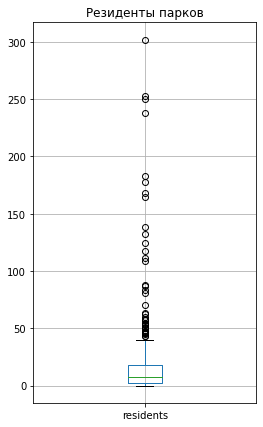

In [ ]:
#@title
plt.figure(figsize=(4,7))
pm_ip_r.boxplot('residents').set_title('Резиденты парков')
print('Общее количество резидентов парков составляет', round(float(pm_ip_r.residents.sum())), 'ед')
print('Среднее количество резидентов в парке составляет', round(float(pm_ip_r.residents.mean())), 'ед')

Общее количество иностранных резидентов парков составляет 398 ед
Среднее количество иностранных резидентов в парке составляет 1 ед


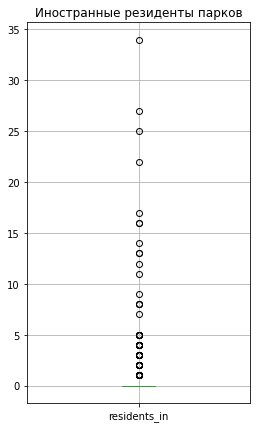

In [ ]:
#@title
plt.figure(figsize=(4,7))
pm_ip_r.boxplot('residents_in').set_title('Иностранные резиденты парков')
print('Общее количество иностранных резидентов парков составляет', round(float(pm_ip_r.residents_in.sum())), 'ед')
print('Среднее количество иностранных резидентов в парке составляет', round(float(pm_ip_r.residents_in.mean())), 'ед')

Общее количество работников резидентов парков составляет 264892 чел
Максимальное количество работников резидентов парка составляет 11638 чел
Среднее количество работников у 1 резидента в парке составляет 37 чел


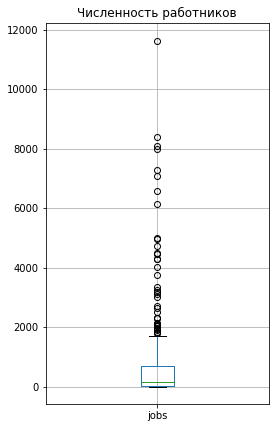

In [ ]:
#@title
plt.figure(figsize=(4,7))
pm_ip_r.boxplot('jobs').set_title('Численность работников')
print('Общее количество работников резидентов парков составляет', round(float(pm_ip_r.jobs.sum())), 'чел')
print('Максимальное количество работников резидентов парка составляет', round(float(pm_ip_r.jobs.max())), 'чел')
print('Среднее количество работников у 1 резидента в парке составляет', round((float(pm_ip_r.jobs.mean()))/round(float(pm_ip_r.residents.mean()))), 'чел')

In [ ]:
#@title
# площадь м.кв. на одного резидента, на одно рабочее место
resident_pm=round(float(pm_im.total.sum()))-round(float(pm_im.free_prom.sum()+pm_im.free_off.sum()))-round(float(pm_im.warehouse.sum()))-round(float(pm_im.tech.sum()))
resident_ip=round(float(ip_im.total.sum()))-round(float(ip_im.free_prom.sum()+ip_im.free_off.sum()))-round(float(ip_im.warehouse.sum()))-round(float(ip_im.tech.sum()))
print('Площадь территории парка занимаемая одним резидентом составляет', round((51702-25676)/round(float(pm_ip_r.residents.sum())), 2), 'га/резидента')
print('Площадь недвижимого имущества парка, занимаемая одним резидентом составляет', round((resident_pm+resident_ip)/round(float(pm_ip_r.residents.sum())),2), 'м.кв/резидента')
print('Площадь недвижимого имущества парка в расчете на одного работника резидента составляет', round((resident_pm+resident_ip)/round(float(pm_ip_r.jobs.sum())),2), 'м.кв/чел.')

Площадь территории парка занимаемая одним резидентом составляет 3.67 га/резидента
Площадь недвижимого имущества парка, занимаемая одним резидентом составляет 1672.38 м.кв/резидента
Площадь недвижимого имущества парка в расчете на одного работника резидента составляет 44.76 м.кв/чел.


***9.1) Производительность (выработка) на резидента / работника парка***

In [ ]:
#@title
# резиденты, рабочие места, выручка 2020

pm_pr=pm[['residents_count|1::parks_tech|4', 'residents_employed_people|1::parks_tech|4', 'production_volume_2020|1::parks_tech|4']]
ip_pr=ip[['residents_count|1::parks_ind|4', 'jobs_created|1::parks_ind|4', 'production_volume_2020_sme|1::parks_ind|4']]
pm_pr=pm_pr.rename(columns={'residents_count|1::parks_tech|4':'residents', 'residents_employed_people|1::parks_tech|4':'jobs', 'production_volume_2020|1::parks_tech|4':'volume'})
pm_pr=pm_pr.drop(labels = 3, axis = 0)
ip_pr=ip_pr.rename(columns={'residents_count|1::parks_ind|4':'residents', 'jobs_created|1::parks_ind|4':'jobs', 'production_volume_2020_sme|1::parks_ind|4':'volume'})
ip_pr=ip_pr.drop(labels = 3, axis = 0)
pm_ip_pr=pd.concat([pm_pr, ip_pr], sort=False)

In [ ]:
#@title
import plotly.graph_objects as go
inf=['Производительность резидента в 2020 году', 'Производительность работника резидента в 2020 году']

fig = go.Figure(data=[
    go.Bar(name='Промышленный технопарк', x=inf, y=[round((float(pm_pr.volume.sum()))/(float(pm_pr.residents.sum()))), round((float(pm_pr.volume.sum()))/(float(pm_pr.jobs.sum())))]),
    go.Bar(name='Индустриальный парк', x=inf, y=[round((float(ip_pr.volume.sum())))/(float(ip_pr.residents.sum())), round((float(ip_pr.volume.sum()))/(float(ip_pr.jobs.sum())))])
])
# Change the bar mode
fig.update_layout(barmode='group', title="Производительность (выработка) резидентов / работников резидентов индустриального парка в 2020", title_x = 0.5,
                  legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

In [ ]:
#@title
print('Производительного резидента промышленного технопарка в 2020 году составила', round((float(pm_pr.volume.sum()))/(float(pm_pr.residents.sum()))), 'млн руб')
print('Производительного работника резидента промышленного технопарка в 2020 году составила', round((float(pm_pr.volume.sum()))/(float(pm_pr.jobs.sum()))), 'млн руб')

Производительного резидента промышленного технопарка в 2020 году составила 102 млн руб
Производительного работника резидента промышленного технопарка в 2020 году составила 5 млн руб


In [ ]:
#@title
print('Производительного резидента индустриального парка в 2020 году составила', round((float(ip_pr.volume.sum()))/(float(ip_pr.residents.sum()))), 'млн руб')
print('Производительного работника резидента индустриального парка в 2020 году составила', round((float(ip_pr.volume.sum()))/(float(ip_pr.jobs.sum()))), 'млн руб')

Производительного резидента индустриального парка в 2020 году составила 64 млн руб
Производительного работника резидента индустриального парка в 2020 году составила 1 млн руб


***10) Выручка, прибыль, налоги, инвестиции***

***10.1) Выручка, прибыль, налоги, инвестиции. Промышленные технопарки***

In [ ]:
pm.head(2)

,name_ru|3::parks_tech|4,federal_ru|2::parks_tech|4,subject_ru|2::parks_tech|4,area_type_ru|2::parks_tech|4,park_type_ru|2::parks_tech|4,commissioning_date|1::parks_tech|4,accreditation_ru|2::parks_tech|4,certificate_ns_ru|2::parks_tech|4,specialization_ru|3::parks_tech|4,okved_2_ru|3::parks_tech|4,included_cluster_infrastructure_ru|2::parks_tech|4,status_ru|2::parks_tech|4,park_type_ownership_ru|2::parks_tech|4,assets_ownership_form_ru|2::parks_tech|4,head_ru|3::parks_tech|4,ownership_form_type_ru|2::parks_tech|4,head_address|3::parks_tech|4,address_ru|3::parks_tech|4,contact_full_name_ru|2::parks_tech|4,website|3::parks_tech|4,real_estate_management_ru|2::parks_tech|4,land_sales_ru|2::parks_tech|4,sale_buildings_ru|2::parks_tech|4,land_rentals_ru|2::parks_tech|4,production_sites_rentals_ru|2::parks_tech|4,production_facilities_construction_ru|2::parks_tech|4,special_equipment_provision_ru|3::parks_tech|4,additional_security_services_ru|2::parks_tech|4,private_security_services_ru|2::parks_tech|4,phone_services_ru|2::parks_tech|4,internet_services_ru|2::parks_tech|4,security_services_ru|2::parks_tech|4,logistic_services_ru|2::parks_tech|4,accounting_services_ru|2::parks_tech|4,financial_services_ru|2::parks_tech|4,staff_recruitment_ru|2::parks_tech|4,legal_services_ru|2::parks_tech|4,consulting_services_ru|2::parks_tech|4,intellectual_property_protection_ru|2::parks_tech|4,advertising_services_ru|2::parks_tech|4,provision_technological_equipment_ru|2::parks_tech|4,postal_secretarial_services_ru|2::parks_tech|4,education_services_ru|2::parks_tech|4,residents_transport_ru|2::parks_tech|4,parking_lot_services_ru|2::parks_tech|4,it_services_ru|2::parks_tech|4,catering_services_ru|2::parks_tech|4,hotel_booking_services_ru|2::parks_tech|4,shared_facilities_operations_ru|2::parks_tech|4,site_cleaning_ru|2::parks_tech|4,info_security_services_ru|2::parks_tech|4,visa_services_ru|2::parks_tech|4,residental_services_ru|2::parks_tech|4,marketing_services_ru|2::parks_tech|4,other_services_ru|3::parks_tech|4,distance_to_city|1::parks_tech|4,distance_to_regional_center|1::parks_tech|4,distance_to_moscow|1::parks_tech|4,distance_to_federal_highway|1::parks_tech|4,nearest_road_ru|2::parks_tech|4,distance_to_road|1::parks_tech|4,road_network_length|1::parks_tech|4,joining_to_railways_ru|2::parks_tech|4,railways_within_ru|2::parks_tech|4,nearest_cargo_terminal_ru|2::parks_tech|4,distance_railway_station|1::parks_tech|4,distance_to_airport|1::parks_tech|4,total_area|1::parks_tech|4,sme_area|1::parks_tech|4,available_area|1::parks_tech|4,hazard_class|2::parks_tech|4,average_price|1::parks_tech|4,average_price_sme|1::parks_tech|4,average_rental_price|1::parks_tech|4,average_rental_price_sme|1::parks_tech|4,documentation_expert_review_ru|2::parks_tech|4,right_use_land_ru|2::parks_tech|4,total_premises_area|1::parks_tech|4,existing_production_area|1::parks_tech|4,existing_production_area_sme|1::parks_tech|4,available_production_area|1::parks_tech|4,production_max_ceiling_height|1::parks_tech|4,production_average_price|1::parks_tech|4,average_cost_selling_premises|1::parks_tech|4,total_offices_area|1::parks_tech|4,free_area_office_premises|1::parks_tech|4,average_rental_cost_office|1::parks_tech|4,average_cost_selling_office|1::parks_tech|4,office_residents_real_estate_area|1::parks_tech|4,warehouse_area|1::parks_tech|4,technical_premises_area|1::parks_tech|4,business_incubator_ru|3::parks_tech|4,engineering_center_ru|3::parks_tech|4,nanotechnological_center_ru|3::parks_tech|4,shared_knowledge_scientific_center_ru|3::parks_tech|4,shared_knowledge_experimental_center_ru|3::parks_tech|4,youth_innovation_creativity_centers_ru|3::parks_tech|4,technology_transfer_ru|3::parks_tech|4,certification_center_ru|3::parks_tech|4,test_center_ru|3::parks_tech|4,metrological_service_ru|3::parks_tech|4,subcontracting_center_ru|3::parks_tech|4,vivarium_ru|3::parks_tech|4,technology_inovation_support_center_ru|3::parks_tech|4,innovation_technology_center_ru|3::parks_te

In [ ]:
#@title
#промышленные технопарки
#название
#выручка
#прибыль
#налоги
#частные инвестиции ук
#бюджетные инвестиции
#инвестиции резидентов

pm_ec=pm[['name_ru|3::parks_tech|4', 'status_ru|2::parks_tech|4',
          'production_volume_2011|1::parks_tech|4', 'production_volume_2012|1::parks_tech|4', 'production_volume_2013|1::parks_tech|4', 'production_volume_2014|1::parks_tech|4',
          'production_volume_2015|1::parks_tech|4', 'production_volume_2016|1::parks_tech|4', 'production_volume_2017|1::parks_tech|4', 'production_volume_2018|1::parks_tech|4', 
          'production_volume_2019|1::parks_tech|4', 'production_volume_2020|1::parks_tech|4',
          'employees_2011|1::parks_tech|4', 'employees_2012|1::parks_tech|4', 'employees_2013|1::parks_tech|4', 'employees_2014|1::parks_tech|4', 'employees_2015|1::parks_tech|4',
          'employees_2016|1::parks_tech|4', 'employees_2017|1::parks_tech|4', 'employees_2018|1::parks_tech|4', 'employees_2019|1::parks_tech|4', 'employees_2020|1::parks_tech|4',
          'tax_revenue_volume_2011|1::parks_tech|4', 'tax_revenue_volume_2012|1::parks_tech|4', 'tax_revenue_volume_2013|1::parks_tech|4', 'tax_revenue_volume_2014|1::parks_tech|4',
          'tax_revenue_volume_2015|1::parks_tech|4', 'tax_revenue_volume_2016|1::parks_tech|4', 'tax_revenue_volume_2017|1::parks_tech|4', 'tax_revenue_volume_2018|1::parks_tech|4',
          'tax_revenue_volume_2019|1::parks_tech|4', 'tax_revenue_volume_2020|1::parks_tech|4',
          'private_investments_volume_2011|1::parks_tech|4', 'private_investments_volume_2012|1::parks_tech|4', 'private_investments_volume_2013|1::parks_tech|4', 'private_investments_volume_2014|1::parks_tech|4',
          'private_investments_volume_2015|1::parks_tech|4', 'private_investments_volume_2016|1::parks_tech|4', 'private_investments_volume_2017|1::parks_tech|4', 'private_investments_volume_2018|1::parks_tech|4',
          'private_investments_volume_2019|1::parks_tech|4', 'private_investments_volume_2020|1::parks_tech|4',
          'public_investments_volume_2011|1::parks_tech|4', 'public_investments_volume_2012|1::parks_tech|4', 'public_investments_volume_2013|1::parks_tech|4', 'public_investments_volume_2014|1::parks_tech|4', 
          'public_investments_volume_2015|1::parks_tech|4', 'public_investments_volume_2016|1::parks_tech|4', 'public_investments_volume_2017|1::parks_tech|4', 'public_investments_volume_2018|1::parks_tech|4',
          'public_investments_volume_2019|1::parks_tech|4', 'public_investments_volume_2020|1::parks_tech|4',
          'residents_investments_volume_2011|1::parks_tech|4', 'residents_investments_volume_2012|1::parks_tech|4', 'residents_investments_volume_2013|1::parks_tech|4', 'residents_investments_volume_2014|1::parks_tech|4',
          'residents_investments_volume_2015|1::parks_tech|4', 'residents_investments_volume_2016|1::parks_tech|4', 'residents_investments_volume_2017|1::parks_tech|4', 'residents_investments_volume_2018|1::parks_tech|4',
          'residents_investments_volume_2019|1::parks_tech|4', 'residents_investments_volume_2020|1::parks_tech|4']]
pm_ec=pm_ec.rename(columns={'name_ru|3::parks_tech|4':'name', 'status_ru|2::parks_tech|4':'status',
          'production_volume_2011|1::parks_tech|4':'volume_2011', 'production_volume_2012|1::parks_tech|4':'volume_2012', 'production_volume_2013|1::parks_tech|4':'volume_2013', 'production_volume_2014|1::parks_tech|4':'volume_2014',
          'production_volume_2015|1::parks_tech|4':'volume_2015', 'production_volume_2016|1::parks_tech|4':'volume_2016', 'production_volume_2017|1::parks_tech|4':'volume_2017', 'production_volume_2018|1::parks_tech|4':'volume_2018', 
          'production_volume_2019|1::parks_tech|4':'volume_2019', 'production_volume_2020|1::parks_tech|4':'volume_2020',
          'employees_2011|1::parks_tech|4':'employees_2011', 'employees_2012|1::parks_tech|4':'employees_2012', 'employees_2013|1::parks_tech|4':'employees_2013', 'employees_2014|1::parks_tech|4':'employees_2014', 'employees_2015|1::parks_tech|4':'employees_2015',
          'employees_2016|1::parks_tech|4':'employees_2016', 'employees_2017|1::parks_tech|4':'employees_2017', 'employees_2018|1::parks_tech|4':'employees_2018', 'employees_2019|1::parks_tech|4':'employees_2019', 'employees_2020|1::parks_tech|4':'employees_2020',
          'tax_revenue_volume_2011|1::parks_tech|4':'tax_2011', 'tax_revenue_volume_2012|1::parks_tech|4':'tax_2012', 'tax_revenue_volume_2013|1::parks_tech|4':'tax_2013', 'tax_revenue_volume_2014|1::parks_tech|4':'tax_2014',
          'tax_revenue_volume_2015|1::parks_tech|4':'tax_2015', 'tax_revenue_volume_2016|1::parks_tech|4':'tax_2016', 'tax_revenue_volume_2017|1::parks_tech|4':'tax_2017', 'tax_revenue_volume_2018|1::parks_tech|4':'tax_2018',
          'tax_revenue_volume_2019|1::parks_tech|4':'tax_2019', 'tax_revenue_volume_2020|1::parks_tech|4':'tax_2020',
          'private_investments_volume_2011|1::parks_tech|4':'private_inv_2011', 'private_investments_volume_2012|1::parks_tech|4':'private_inv_2012', 'private_investments_volume_2013|1::parks_tech|4':'private_inv_2013', 'private_investments_volume_2014|1::parks_tech|4':'private_inv_2014',
          'private_investments_volume_2015|1::parks_tech|4':'private_inv_2015', 'private_investments_volume_2016|1::parks_tech|4':'private_inv_2016', 'private_investments_volume_2017|1::parks_tech|4':'private_inv_2017', 'private_investments_volume_2018|1::parks_tech|4':'private_inv_2018',
          'private_investments_volume_2019|1::parks_tech|4':'private_inv_2019', 'private_investments_volume_2020|1::parks_tech|4':'private_inv_2020',
          'public_investments_volume_2011|1::parks_tech|4':'pub_inv_2011', 'public_investments_volume_2012|1::parks_tech|4':'pub_inv_2012', 'public_investments_volume_2013|1::parks_tech|4':'pub_inv_2013', 'public_investments_volume_2014|1::parks_tech|4':'pub_inv_2014', 
          'public_investments_volume_2015|1::parks_tech|4':'pub_inv_2015', 'public_investments_volume_2016|1::parks_tech|4':'pub_inv_2016', 'public_investments_volume_2017|1::parks_tech|4':'pub_inv_2017', 'public_investments_volume_2018|1::parks_tech|4':'pub_inv_2018',
          'public_investments_volume_2019|1::parks_tech|4':'pub_inv_2019', 'public_investments_volume_2020|1::parks_tech|4':'pub_inv_2020',
          'residents_investments_volume_2011|1::parks_tech|4':'res_inv_2011', 'residents_investments_volume_2012|1::parks_tech|4':'res_inv_2012', 'residents_investments_volume_2013|1::parks_tech|4':'res_inv_2013', 'residents_investments_volume_2014|1::parks_tech|4':'res_inv_2014',
          'residents_investments_volume_2015|1::parks_tech|4':'res_inv_2015', 'residents_investments_volume_2016|1::parks_tech|4':'res_inv_2016', 'residents_investments_volume_2017|1::parks_tech|4':'res_inv_2017', 'residents_investments_volume_2018|1::parks_tech|4':'res_inv_2018',
          'residents_investments_volume_2019|1::parks_tech|4':'res_inv_2019', 'residents_investments_volume_2020|1::parks_tech|4':'res_inv_2020'})
pm_ec=pm_ec.drop(labels = 3, axis = 0)

In [ ]:
pm_ec=pm_ec.fillna(0)
#pm_ec.mean()

In [ ]:
pm_ec.head(3)
pm_ec.sort_values('tax_2020', axis=0, ascending=False)

,name,status,volume_2011,volume_2012,volume_2013,volume_2014,volume_2015,volume_2016,volume_2017,volume_2018,volume_2019,volume_2020,employees_2011,employees_2012,employees_2013,employees_2014,employees_2015,employees_2016,employees_2017,employees_2018,employees_2019,employees_2020,tax_2011,tax_2012,tax_2013,tax_2014,tax_2015,tax_2016,tax_2017,tax_2018,tax_2019,tax_2020,private_inv_2011,private_inv_2012,private_inv_2013,private_inv_2014,private_inv_2015,private_inv_2016,private_inv_2017,private_inv_2018,private_inv_2019,private_inv_2020,pub_inv_2011,pub_inv_2012,pub_inv_2013,pub_inv_2014,pub_inv_2015,pub_inv_2016,pub_inv_2017,pub_inv_2018,pub_inv_2019,pub_inv_2020,res_inv_2011,res_inv_2012,res_inv_2013,res_inv_2014,res_inv_2015,res_inv_2016,res_inv_2017,res_inv_2018,res_inv_2019,res_inv_2020
39,Полюс,Действует,1379.000,0.00000,0.00000,0.000000,0.00000,2529.0000,3332.00000,4651.00000,4059.000,4859.0000,0,0.0,0.0,0.0,0.0,2121.0,2225.0,2348.0,2244.0,2162.0,0.000,0.000,0.000,0.0000,0.00000,100.81400,146.33000,348.050,408.02800,5473.00000,0.00,0.0,0.0,0.000,0.000,226.0,328.000,638.80,322.600,519.000,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,65.4000,78.200,83.600,65.040,44.000
37,ОЭЗ ТВТ Исток,Действует,0.000,0.00000,0.00000,0.000000,0.00000,5950.0000,10015.64000,12316.64000,11495.320,20181.3700,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,0.00000,331.00000,1272.00000,1937.000,2795.00000,4029.93000,0.00,0.0,0.0,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,329.0000,24324.000,9530.000,9779.000,8321.240
16,Жигулевская долина,Действует,0.000,0.00000,0.00000,735.900000,1003.20000,1552.8000,5637.90000,8090.20000,7986.200,10456.3000,0,0.0,239.0,331.0,991.0,1667.0,1780.0,2131.0,2335.0,2025.0,0.000,0.000,0.000,20.1000,119.90000,262.60000,2204.60000,2228.700,2712.00000,4021.00000,0.00,0.0,0.0,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.000,0.00,5771.450,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,328.800,839.30000,1569.0000,2393.200,2414.400,4148.700,3501.200
7,Научно-технологический парк Новосибирского Академгородка (Академпарк),Действует,2937.000,5012.00000,6460.00000,9523.000000,11951.00000,13648.0000,13150.00000,13474.00000,14339.000,15945.0000,1395,2868.0,3830.0,4500.0,5540.0,4875.0,4987.0,4739.0,5158.0,4722.0,222.000,445.000,468.000,534.0000,1229.00000,1302.00000,1128.00000,2671.000,1483.00000,2135.00000,349.00,395.0,872.0,1621.000,429.000,1054.0,1845.000,1952.00,2044.000,1038.000,1505.00,859.000,630.00,270.000,67.00,111.000,0.00,0.00,0.000,0.000,0.000,507.000,176.000,229.000,450.00000,1418.0000,615.000,899.000,1792.000,451.000
27,"Технополис ""Москва""",Действует,0.000,1000.00000,2000.00000,4280.000000,6345.00000,6463.0000,10777.00000,12475.00000,17402.000,11886.8000,620,775.0,929.0,1333.0,1658.0,2199.0,3034.0,3063.0,3963.0,3341.0,0.000,112.000,224.000,479.3600,575.60000,672.75000,1505.69000,1284.720,2422.25000,2040.33000,0.00,0.0,0.0,0.000,0.000,0.0,0.000,0.00,0.000,0.000,5.39,436.320,1317.53,1317.370,852.15,1300.580,37.87,0.00,0.000,0.000,0.000,874.300,4082.260,3570.200,1705.73000,1300.9000,1519.640,1574.440,648.480,1280.780
15,Инновационно-производственный Технопарк «Идея»,Действует,4613.000,6922.00000,7016.00000,8108.000000,7828.00000,8512.0000,12024.00000,14400.00000,14435.000,22886.0000,1891,1855.0,1805.0,1824.0,2162.0,2187.0,2131.0,2305.0,2310.0,2625.0,0.000,0.000,0.000,0.0000,0.00000,0.00000,0.00000,0.000,1887.00000,1514.00000,2310.00,2310.0,2310.0,2310.000,2310.000,2310.0,2310.000,2310.00,2310.000,2310.000,509.00,509.000,509.00,509.000,509.00,509.000,509.00,509.00,509.000,509.000,0.000,0.000,0.000,0.000,0.00000,0.0000,0.000,0.000,247.000,885.000
54,СХОДНЯ-ГРАНД,Действует,2500.000,2700.00000,2800.00000,2800.000000,3000.00000,4000.0000,4000.00000,4000.00000,4500.000,4000.0000,1000,900.0,900.0,850.0,800.0,750.0,750.0,750.0,750.0,750.0,875.000,945.000,980.000,980.0000,1050.00000,1

In [ ]:
#@title
pm_ec_1 = pd.DataFrame({'Год':['2011', '2011', '2011', '2011', '2011', '2011',
                               '2012', '2012', '2012', '2012', '2012', '2012',
                               '2013', '2013', '2013', '2013', '2013', '2013',
                               '2014', '2014', '2014', '2014', '2014', '2014',
                               '2015', '2015', '2015', '2015', '2015', '2015',
                               '2016', '2016', '2016', '2016', '2016', '2016',
                               '2017', '2017', '2017', '2017', '2017', '2017',
                               '2018', '2018', '2018', '2018', '2018', '2018',
                               '2019', '2019', '2019', '2019', '2019', '2019',
                               '2020', '2020', '2020', '2020', '2020', '2020'],
                        'Показатель':['Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов', 
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов', 
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов'],
                       'Млн руб':[round(float(pm_ec.volume_2011.sum())), round(float(pm_ec.employees_2011.sum())), round(float(pm_ec.tax_2011.sum())), round(float(pm_ec.private_inv_2011.sum())), round(float(pm_ec.pub_inv_2011.sum())), round(float(pm_ec.res_inv_2011.sum())),
                                   round(float(pm_ec.volume_2012.sum())), round(float(pm_ec.employees_2012.sum())), round(float(pm_ec.tax_2012.sum())), round(float(pm_ec.private_inv_2012.sum())), round(float(pm_ec.pub_inv_2012.sum())), round(float(pm_ec.res_inv_2012.sum())),
                                   round(float(pm_ec.volume_2013.sum())), round(float(pm_ec.employees_2013.sum())), round(float(pm_ec.tax_2013.sum())), round(float(pm_ec.private_inv_2013.sum())), round(float(pm_ec.pub_inv_2013.sum())), round(float(pm_ec.res_inv_2013.sum())),
                                   round(float(pm_ec.volume_2014.sum())), round(float(pm_ec.employees_2014.sum())), round(float(pm_ec.tax_2014.sum())), round(float(pm_ec.private_inv_2014.sum())), round(float(pm_ec.pub_inv_2014.sum())), round(float(pm_ec.res_inv_2014.sum())),
                                   round(float(pm_ec.volume_2015.sum())), round(float(pm_ec.employees_2015.sum())), round(float(pm_ec.tax_2015.sum())), round(float(pm_ec.private_inv_2015.sum())), round(float(pm_ec.pub_inv_2015.sum())), round(float(pm_ec.res_inv_2015.sum())),
                                   round(float(pm_ec.volume_2016.sum())), round(float(pm_ec.employees_2016.sum())), round(float(pm_ec.tax_2016.sum())), round(float(pm_ec.private_inv_2016.sum())), round(float(pm_ec.pub_inv_2016.sum())), round(float(pm_ec.res_inv_2016.sum())),
                                   round(float(pm_ec.volume_2017.sum())), round(float(pm_ec.employees_2017.sum())), round(float(pm_ec.tax_2017.sum())), round(float(pm_ec.private_inv_2017.sum())), round(float(pm_ec.pub_inv_2017.sum())), round(float(pm_ec.res_inv_2017.sum())),
                                   round(float(pm_ec.volume_2018.sum())), round(float(pm_ec.employees_2018.sum())), round(float(pm_ec.tax_2018.sum())), round(float(pm_ec.private_inv_2018.sum())), round(float(pm_ec.pub_inv_2018.sum())), round(float(pm_ec.res_inv_2018.sum())),
                                   round(float(pm_ec.volume_2019.sum())), round(float(pm_ec.employees_2019.sum())), round(float(pm_ec.tax_2019.sum())), round(float(pm_ec.private_inv_2019.sum())), round(float(pm_ec.pub_inv_2019.sum())), round(float(pm_ec.res_inv_2019.sum())),
                                   round(float(pm_ec.volume_2020.sum())), round(float(pm_ec.employees_2020.sum())), round(float(pm_ec.tax_2020.sum())), round(float(pm_ec.private_inv_2020.sum())), round(float(pm_ec.pub_inv_2020.sum())), round(float(pm_ec.res_inv_2020.sum()))]
                        })
pm_ec_1.head(3)

,Год,Показатель,Млн руб
0,2011,Выручка,35280
1,2011,Прибыль,23226
2,2011,Налоги,2007


In [ ]:
#@title
import plotly.express as px
fig = px.line(pm_ec_1, x='Год', y='Млн руб', color='Показатель', title='Экономические показатели деятельности промышленных технопарков')
fig.show()
print('Выручка промышленных технопарков за 2011-2020 годы составила', round(float(sum(pm_ec.volume_2011)))+round(float(sum(pm_ec.volume_2012)))
+round(float(sum(pm_ec.volume_2013)))+round(float(sum(pm_ec.volume_2014)))+round(float(sum(pm_ec.volume_2015)))+round(float(sum(pm_ec.volume_2016)))
+round(float(sum(pm_ec.volume_2017)))+round(float(sum(pm_ec.volume_2018)))+round(float(sum(pm_ec.volume_2019)))+round(float(sum(pm_ec.volume_2020))), 'млн руб.')
print('Налоговые отчисления за 2011-2020 годы составили', round(float(sum(pm_ec.tax_2011)))+round(float(sum(pm_ec.tax_2012)))
+round(float(sum(pm_ec.tax_2013)))+round(float(sum(pm_ec.tax_2014)))+round(float(sum(pm_ec.tax_2015)))+round(float(sum(pm_ec.tax_2016)))
+round(float(sum(pm_ec.tax_2017)))+round(float(sum(pm_ec.tax_2018)))+round(float(sum(pm_ec.tax_2019)))+round(float(sum(pm_ec.tax_2020))), 'млн руб.')
print('Инвестиции в инфраструктуру за 2011-2020 годы составили', round(float(sum(pm_ec.private_inv_2011)))+round(float(sum(pm_ec.private_inv_2012)))
+round(float(sum(pm_ec.private_inv_2013)))+round(float(sum(pm_ec.private_inv_2014)))+round(float(sum(pm_ec.private_inv_2015)))+round(float(sum(pm_ec.private_inv_2016)))
+round(float(sum(pm_ec.private_inv_2017)))+round(float(sum(pm_ec.private_inv_2018)))+round(float(sum(pm_ec.private_inv_2019)))+round(float(sum(pm_ec.private_inv_2020)))
+round(float(sum(pm_ec.pub_inv_2011)))+round(float(sum(pm_ec.pub_inv_2012)))+round(float(sum(pm_ec.pub_inv_2013)))+round(float(sum(pm_ec.pub_inv_2014)))+round(float(sum(pm_ec.pub_inv_2015)))
+round(float(sum(pm_ec.pub_inv_2016)))+round(float(sum(pm_ec.pub_inv_2017)))+round(float(sum(pm_ec.pub_inv_2018)))+round(float(sum(pm_ec.pub_inv_2019)))+round(float(sum(pm_ec.pub_inv_2020))), 'млн руб.', 
'в том числе бюджетные инвестиции', round(float(sum(pm_ec.pub_inv_2011)))+round(float(sum(pm_ec.pub_inv_2012)))+round(float(sum(pm_ec.pub_inv_2013)))+round(float(sum(pm_ec.pub_inv_2014)))+round(float(sum(pm_ec.pub_inv_2015)))
+round(float(sum(pm_ec.pub_inv_2016)))+round(float(sum(pm_ec.pub_inv_2017)))+round(float(sum(pm_ec.pub_inv_2018)))+round(float(sum(pm_ec.pub_inv_2019)))+round(float(sum(pm_ec.pub_inv_2020))), 'млн руб.')
print('На 1 руб. бюджетных инвестиций приходится', 
      round((round(float(sum(pm_ec.tax_2011)))+round(float(sum(pm_ec.tax_2012)))
+round(float(sum(pm_ec.tax_2013)))+round(float(sum(pm_ec.tax_2014)))+round(float(sum(pm_ec.tax_2015)))+round(float(sum(pm_ec.tax_2016)))
+round(float(sum(pm_ec.tax_2017)))+round(float(sum(pm_ec.tax_2018)))+round(float(sum(pm_ec.tax_2019)))+round(float(sum(pm_ec.tax_2020))))/(round(float(sum(pm_ec.pub_inv_2011)))+round(float(sum(pm_ec.pub_inv_2012)))+round(float(sum(pm_ec.pub_inv_2013)))+round(float(sum(pm_ec.pub_inv_2014)))+round(float(sum(pm_ec.pub_inv_2015)))
+round(float(sum(pm_ec.pub_inv_2016)))+round(float(sum(pm_ec.pub_inv_2017)))+round(float(sum(pm_ec.pub_inv_2018)))+round(float(sum(pm_ec.pub_inv_2019)))+round(float(sum(pm_ec.pub_inv_2020)))), 2), 'руб. налоговых платежей')


Выручка промышленных технопарков за 2011-2020 годы составила 1253790 млн руб.
Налоговые отчисления за 2011-2020 годы составили 123296 млн руб.
Инвестиции в инфраструктуру за 2011-2020 годы составили 422976 млн руб. в том числе бюджетные инвестиции 359743 млн руб.
На 1 руб. бюджетных инвестиций приходится 0.34 руб. налоговых платежей


***10.2) Выручка, прибыль, налоги, инвестиции. Индустриальные парки***

In [ ]:
#@title
#индустриальные парки 
#название
#выручка
#прибыль
#налоги
#частные инвестиции ук
#бюджетные инвестиции
#инвестиции резидентов

ip_ec=ip[['name_ru|2::parks_ind|4', 'status_ru|2::parks_ind|4',
          'production_volume_2011|1::parks_ind|4', 'production_volume_2012|1::parks_ind|4', 'production_volume_2013|1::parks_ind|4', 'production_volume_2014|1::parks_ind|4',
          'production_volume_2015|1::parks_ind|4', 'production_volume_2016|1::parks_ind|4', 'production_volume_2017|1::parks_ind|4', 'production_volume_2018|1::parks_ind|4', 
          'production_volume_2019|1::parks_ind|4', 'production_volume_2020|1::parks_ind|4',
          'employees_2011|1::parks_ind|4', 'employees_2012|1::parks_ind|4', 'employees_2013|1::parks_ind|4', 'employees_2014|1::parks_ind|4', 'employees_2015|1::parks_ind|4',
          'employees_2016|1::parks_ind|4', 'employees_2017|1::parks_ind|4', 'employees_2018|1::parks_ind|4', 'employees_2019|1::parks_ind|4', 'employees_2020|1::parks_ind|4',
          'tax_revenue_volume_2011|1::parks_ind|4', 'tax_revenue_volume_2012|1::parks_ind|4', 'tax_revenue_volume_2013|1::parks_ind|4', 'tax_revenue_volume_2014|1::parks_ind|4',
          'tax_revenue_volume_2015|1::parks_ind|4', 'tax_revenue_volume_2016|1::parks_ind|4', 'tax_revenue_volume_2017|1::parks_ind|4', 'tax_revenue_volume_2018|1::parks_ind|4',
          'tax_revenue_volume_2019|1::parks_ind|4', 'tax_revenue_volume_2020|1::parks_ind|4',
          'private_investments_volume_2011|1::parks_ind|4', 'private_investments_volume_2012|1::parks_ind|4', 'private_investments_volume_2013|1::parks_ind|4', 'private_investments_volume_2014|1::parks_ind|4',
          'private_investments_volume_2015|1::parks_ind|4', 'private_investments_volume_2016|1::parks_ind|4', 'private_investments_volume_2017|1::parks_ind|4', 'private_investments_volume_2018|1::parks_ind|4',
          'private_investments_volume_2019|1::parks_ind|4', 'private_investments_volume_2020|1::parks_ind|4',
          'public_investments_volume_2011|1::parks_ind|4', 'public_investments_volume_2012|1::parks_ind|4', 'public_investments_volume_2013|1::parks_ind|4', 'public_investments_volume_2014|1::parks_ind|4', 
          'public_investments_volume_2015|1::parks_ind|4', 'public_investments_volume_2016|1::parks_ind|4', 'public_investments_volume_2017|1::parks_ind|4', 'public_investments_volume_2018|1::parks_ind|4',
          'public_investments_volume_2019|1::parks_ind|4', 'public_investments_volume_2020|1::parks_ind|4',
          'residents_investments_volume_2011|1::parks_ind|4', 'residents_investments_volume_2012|1::parks_ind|4', 'residents_investments_volume_2013|1::parks_ind|4', 'residents_investments_volume_2014|1::parks_ind|4',
          'residents_investments_volume_2015|1::parks_ind|4', 'residents_investments_volume_2016|1::parks_ind|4', 'residents_investments_volume_2017|1::parks_ind|4', 'residents_investments_volume_2018|1::parks_ind|4',
          'residents_investments_volume_2019|1::parks_ind|4', 'residents_investments_volume_2020|1::parks_ind|4']]
ip_ec=ip_ec.rename(columns={'name_ru|2::parks_ind|4':'name', 'status_ru|2::parks_ind|4':'status',
          'production_volume_2011|1::parks_ind|4':'volume_2011', 'production_volume_2012|1::parks_ind|4':'volume_2012', 'production_volume_2013|1::parks_ind|4':'volume_2013', 'production_volume_2014|1::parks_ind|4':'volume_2014',
          'production_volume_2015|1::parks_ind|4':'volume_2015', 'production_volume_2016|1::parks_ind|4':'volume_2016', 'production_volume_2017|1::parks_ind|4':'volume_2017', 'production_volume_2018|1::parks_ind|4':'volume_2018', 
          'production_volume_2019|1::parks_ind|4':'volume_2019', 'production_volume_2020|1::parks_ind|4':'volume_2020',
          'employees_2011|1::parks_ind|4':'employees_2011', 'employees_2012|1::parks_ind|4':'employees_2012', 'employees_2013|1::parks_ind|4':'employees_2013', 'employees_2014|1::parks_ind|4':'employees_2014', 'employees_2015|1::parks_ind|4':'employees_2015',
          'employees_2016|1::parks_ind|4':'employees_2016', 'employees_2017|1::parks_ind|4':'employees_2017', 'employees_2018|1::parks_ind|4':'employees_2018', 'employees_2019|1::parks_ind|4':'employees_2019', 'employees_2020|1::parks_ind|4':'employees_2020',
          'tax_revenue_volume_2011|1::parks_ind|4':'tax_2011', 'tax_revenue_volume_2012|1::parks_ind|4':'tax_2012', 'tax_revenue_volume_2013|1::parks_ind|4':'tax_2013', 'tax_revenue_volume_2014|1::parks_ind|4':'tax_2014',
          'tax_revenue_volume_2015|1::parks_ind|4':'tax_2015', 'tax_revenue_volume_2016|1::parks_ind|4':'tax_2016', 'tax_revenue_volume_2017|1::parks_ind|4':'tax_2017', 'tax_revenue_volume_2018|1::parks_ind|4':'tax_2018',
          'tax_revenue_volume_2019|1::parks_ind|4':'tax_2019', 'tax_revenue_volume_2020|1::parks_ind|4':'tax_2020',
          'private_investments_volume_2011|1::parks_ind|4':'private_inv_2011', 'private_investments_volume_2012|1::parks_ind|4':'private_inv_2012', 'private_investments_volume_2013|1::parks_ind|4':'private_inv_2013', 'private_investments_volume_2014|1::parks_ind|4':'private_inv_2014',
          'private_investments_volume_2015|1::parks_ind|4':'private_inv_2015', 'private_investments_volume_2016|1::parks_ind|4':'private_inv_2016', 'private_investments_volume_2017|1::parks_ind|4':'private_inv_2017', 'private_investments_volume_2018|1::parks_ind|4':'private_inv_2018',
          'private_investments_volume_2019|1::parks_ind|4':'private_inv_2019', 'private_investments_volume_2020|1::parks_ind|4':'private_inv_2020',
          'public_investments_volume_2011|1::parks_ind|4':'pub_inv_2011', 'public_investments_volume_2012|1::parks_ind|4':'pub_inv_2012', 'public_investments_volume_2013|1::parks_ind|4':'pub_inv_2013', 'public_investments_volume_2014|1::parks_ind|4':'pub_inv_2014', 
          'public_investments_volume_2015|1::parks_ind|4':'pub_inv_2015', 'public_investments_volume_2016|1::parks_ind|4':'pub_inv_2016', 'public_investments_volume_2017|1::parks_ind|4':'pub_inv_2017', 'public_investments_volume_2018|1::parks_ind|4':'pub_inv_2018',
          'public_investments_volume_2019|1::parks_ind|4':'pub_inv_2019', 'public_investments_volume_2020|1::parks_ind|4':'pub_inv_2020',
          'residents_investments_volume_2011|1::parks_ind|4':'res_inv_2011', 'residents_investments_volume_2012|1::parks_ind|4':'res_inv_2012', 'residents_investments_volume_2013|1::parks_ind|4':'res_inv_2013', 'residents_investments_volume_2014|1::parks_ind|4':'res_inv_2014',
          'residents_investments_volume_2015|1::parks_ind|4':'res_inv_2015', 'residents_investments_volume_2016|1::parks_ind|4':'res_inv_2016', 'residents_investments_volume_2017|1::parks_ind|4':'res_inv_2017', 'residents_investments_volume_2018|1::parks_ind|4':'res_inv_2018',
          'residents_investments_volume_2019|1::parks_ind|4':'res_inv_2019', 'residents_investments_volume_2020|1::parks_ind|4':'res_inv_2020'})
ip_ec=ip_ec.drop(labels = 3, axis = 0)

In [ ]:
ip_ec=ip_ec.fillna(0)
ip_ec.head(3)
ip_ec.at[42, 'tax_2018'] = '1721.002'
ip_ec.at[136, 'volume_2018'] = '1055.000'
ip_ec.sort_values('volume_2018', axis=0, ascending=False)

,name,status,volume_2011,volume_2012,volume_2013,volume_2014,volume_2015,volume_2016,volume_2017,volume_2018,volume_2019,volume_2020,employees_2011,employees_2012,employees_2013,employees_2014,employees_2015,employees_2016,employees_2017,employees_2018,employees_2019,employees_2020,tax_2011,tax_2012,tax_2013,tax_2014,tax_2015,tax_2016,tax_2017,tax_2018,tax_2019,tax_2020,private_inv_2011,private_inv_2012,private_inv_2013,private_inv_2014,private_inv_2015,private_inv_2016,private_inv_2017,private_inv_2018,private_inv_2019,private_inv_2020,pub_inv_2011,pub_inv_2012,pub_inv_2013,pub_inv_2014,pub_inv_2015,pub_inv_2016,pub_inv_2017,pub_inv_2018,pub_inv_2019,pub_inv_2020,res_inv_2011,res_inv_2012,res_inv_2013,res_inv_2014,res_inv_2015,res_inv_2016,res_inv_2017,res_inv_2018,res_inv_2019,res_inv_2020
5,Грабцево,Действует,84275.796,132703.825,139612.681,130331.439,130264.900,150454.40,198352.80,194856.000,198206.00000,195963.00,6900,7525.0,7488.0,6890.0,6201.0,7183.0,7712.0,7932.0,7632.0,7098.0,0.00,0.00,0.00,12678.315000,10743.48300,10526.608,13717.700,24145.900,29766.700,39954.100,54.000,161.000,150.000,805.000,1040.000,58.000000,1.000000,2.000000,1.000,0.000,0.0,0.0,3130.366,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,81332.719,8309.0,14252.0,2624.000,4645.000,2210.00,5670.0,4504.00
4,Ворсино,Действует,59750.053,67540.387,67468.442,83030.230,98431.400,117690.70,121932.30,162282.000,183996.00000,218009.00,2960,3468.0,4757.0,5916.0,4645.0,6165.0,6201.0,6539.0,6072.0,6152.0,0.00,0.00,0.00,6039.371000,5643.84500,5553.455,9186.067,10335.567,14824.062,19312.124,247.000,724.000,1707.000,651.000,743.000,70.000000,73.000000,63.000000,99.000,405.300,0.0,0.0,62.852,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,63719.000,8702.0,18475.0,8843.000,10818.000,15766.00,11908.0,8211.00
126,Алабуга-2.Нефтехимия,Действует,0.000,0.000,0.000,0.000,0.000,0.00,0.00,87153.868,90768.67149,69802.04,0,0.0,0.0,0.0,0.0,0.0,0.0,6095.0,8408.0,8851.0,0.00,0.00,0.00,0.000000,0.00000,0.000,0.000,17621.360,40264.780,27461.140,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,760.500,27.086,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,3230.913172,5090.2599,0.0,0.0,0.000,0.0,0.0,0.000,0.000,40067.82,37701.2,57587.54
38,ОЭЗ ППТ Алабуга,Действует,11757.045,20344.620,33651.410,31465.520,36552.990,54280.55,68813.32,80594.400,69048.75000,72480.50,2700,2536.0,4219.0,5087.0,5433.0,5634.0,6389.0,6915.0,6919.0,7287.0,1878.88,1308.26,2408.78,2427.500000,3331.24000,3728.110,5464.430,5473.620,7601.530,6781.820,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,2932.0,4000.0,0.000,5100.0,3000.0,0.0,1112.0,2330.0,2180.000000,2063.0000,13379.0,8656.0,21445.000,26983.0,12380.0,9391.000,5482.000,13692.00,8323.0,9104.00
36,КИП Мастер,Действует,21987.959,32329.301,30515.946,28299.898,28886.763,42783.00,67554.00,75781.000,114538.00000,133641.00,3233,4545.0,4724.0,4989.0,4891.0,5075.0,5558.0,6917.0,10024.0,11638.0,2155.00,3168.00,2991.00,2773.390015,2830.90274,4192.766,6620.286,7426.572,11225.000,13096.000,184.189,206.733,536.855,437.432,555.488,1076.517013,1717.890221,867.926441,688.471,789.336,0.0,0.0,200.000,0.0,31.6,0.0,0.0,0.0,0.000000,0.0000,582.0,1120.0,435.000,338.0,1556.0,895.876,527.575,578.24,104.0,71.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Кондинский,Действует,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.00000,29.80,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.00,0.00,0.00,0.000000,0.00000,0.000,0.000,0.000,0.000,13.300,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.00,0.0,30.00
172,Шексна,Действует,1200.000,3563.000,1710.000,1514.000,0.000,0.00,0.00,0.000,0.00000,714.40,240,254.0,241.0,235.0,235.0,235.0,235.0,235.0,235.0,235.0,0.00,0.00,0.00,273.00

In [ ]:
#@title
ip_ec_1 = pd.DataFrame({'Год':['2011', '2011', '2011', '2011', '2011', '2011',
                               '2012', '2012', '2012', '2012', '2012', '2012',
                               '2013', '2013', '2013', '2013', '2013', '2013',
                               '2014', '2014', '2014', '2014', '2014', '2014',
                               '2015', '2015', '2015', '2015', '2015', '2015',
                               '2016', '2016', '2016', '2016', '2016', '2016',
                               '2017', '2017', '2017', '2017', '2017', '2017',
                               '2018', '2018', '2018', '2018', '2018', '2018',
                               '2019', '2019', '2019', '2019', '2019', '2019',
                               '2020', '2020', '2020', '2020', '2020', '2020'],
                        'Показатель':['Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов', 
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов', 
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов',
                                       'Выручка', 'Прибыль', 'Налоги', 'Инвестиции УК', 'Бюджетные инвестиции', 'Инвестиции резидентов'],
                       'Млн руб':[round(float(ip_ec.volume_2011.sum())), round(float(ip_ec.employees_2011.sum())), round(float(ip_ec.tax_2011.sum())), round(float(ip_ec.private_inv_2011.sum())), round(float(ip_ec.pub_inv_2011.sum())), round(float(ip_ec.res_inv_2011.sum())),
                                   round(float(ip_ec.volume_2012.sum())), round(float(ip_ec.employees_2012.sum())), round(float(ip_ec.tax_2012.sum())), round(float(ip_ec.private_inv_2012.sum())), round(float(ip_ec.pub_inv_2012.sum())), round(float(ip_ec.res_inv_2012.sum())),
                                   round(float(ip_ec.volume_2013.sum())), round(float(ip_ec.employees_2013.sum())), round(float(ip_ec.tax_2013.sum())), round(float(ip_ec.private_inv_2013.sum())), round(float(ip_ec.pub_inv_2013.sum())), round(float(ip_ec.res_inv_2013.sum())),
                                   round(float(ip_ec.volume_2014.sum())), round(float(ip_ec.employees_2014.sum())), round(float(ip_ec.tax_2014.sum())), round(float(ip_ec.private_inv_2014.sum())), round(float(ip_ec.pub_inv_2014.sum())), round(float(ip_ec.res_inv_2014.sum())),
                                   round(float(ip_ec.volume_2015.sum())), round(float(ip_ec.employees_2015.sum())), round(float(ip_ec.tax_2015.sum())), round(float(ip_ec.private_inv_2015.sum())), round(float(ip_ec.pub_inv_2015.sum())), round(float(ip_ec.res_inv_2015.sum())),
                                   round(float(ip_ec.volume_2016.sum())), round(float(ip_ec.employees_2016.sum())), round(float(ip_ec.tax_2016.sum())), round(float(ip_ec.private_inv_2016.sum())), round(float(ip_ec.pub_inv_2016.sum())), round(float(ip_ec.res_inv_2016.sum())),
                                   round(float(ip_ec.volume_2017.sum())), round(float(ip_ec.employees_2017.sum())), round(float(ip_ec.tax_2017.sum())), round(float(ip_ec.private_inv_2017.sum())), round(float(ip_ec.pub_inv_2017.sum())), round(float(ip_ec.res_inv_2017.sum())),
                                   round(float(ip_ec.volume_2018.sum())), round(float(ip_ec.employees_2018.sum())), round(float(ip_ec.tax_2018.sum())), round(float(ip_ec.private_inv_2018.sum())), round(float(ip_ec.pub_inv_2018.sum())), round(float(ip_ec.res_inv_2018.sum())),
                                   round(float(ip_ec.volume_2019.sum())), round(float(ip_ec.employees_2019.sum())), round(float(ip_ec.tax_2019.sum())), round(float(ip_ec.private_inv_2019.sum())), round(float(ip_ec.pub_inv_2019.sum())), round(float(ip_ec.res_inv_2019.sum())),
                                   round(float(ip_ec.volume_2020.sum())), round(float(ip_ec.employees_2020.sum())), round(float(ip_ec.tax_2020.sum())), round(float(ip_ec.private_inv_2020.sum())), round(float(ip_ec.pub_inv_2020.sum())), round(float(ip_ec.res_inv_2020.sum()))]
                        })
ip_ec_1.head(3)

,Год,Показатель,Млн руб
0,2011,Выручка,280588
1,2011,Прибыль,46078
2,2011,Налоги,6775


In [ ]:
#@title
import plotly.express as px
fig = px.line(ip_ec_1, x='Год', y='Млн руб', color='Показатель', title='Экономические показатели деятельности индустриальных парков')
fig.show()
print('Выручка промышленных технопарков за 2011-2020 годы составила', round(float(sum(ip_ec.volume_2011)))+round(float(sum(ip_ec.volume_2012)))
+round(float(sum(ip_ec.volume_2013)))+round(float(sum(ip_ec.volume_2014)))+round(float(sum(ip_ec.volume_2015)))+round(float(sum(ip_ec.volume_2016)))
+round(float(sum(ip_ec.volume_2017)))+round(float(sum(ip_ec.volume_2018)))+round(float(sum(ip_ec.volume_2019)))+round(float(sum(ip_ec.volume_2020))), 'млн руб.')
print('Налоговые отчисления за 2011-2020 годы составили', round(float(sum(ip_ec.tax_2011)))+round(float(sum(ip_ec.tax_2012)))
+round(float(sum(ip_ec.tax_2013)))+round(float(sum(ip_ec.tax_2014)))+round(float(sum(ip_ec.tax_2015)))+round(float(sum(ip_ec.tax_2016)))
+round(float(sum(ip_ec.tax_2017)))+round(float(sum(ip_ec.tax_2018)))+round(float(sum(ip_ec.tax_2019)))+round(float(sum(ip_ec.tax_2020))), 'млн руб.')
print('Инвестиции в инфраструктуру за 2011-2020 годы составили', round(float(sum(ip_ec.private_inv_2011)))+round(float(sum(ip_ec.private_inv_2012)))
+round(float(sum(ip_ec.private_inv_2013)))+round(float(sum(ip_ec.private_inv_2014)))+round(float(sum(pm_ec.private_inv_2015)))+round(float(sum(ip_ec.private_inv_2016)))
+round(float(sum(ip_ec.private_inv_2017)))+round(float(sum(ip_ec.private_inv_2018)))+round(float(sum(pm_ec.private_inv_2019)))+round(float(sum(ip_ec.private_inv_2020)))
+round(float(sum(ip_ec.pub_inv_2011)))+round(float(sum(ip_ec.pub_inv_2012)))+round(float(sum(ip_ec.pub_inv_2013)))+round(float(sum(ip_ec.pub_inv_2014)))+round(float(sum(ip_ec.pub_inv_2015)))
+round(float(sum(ip_ec.pub_inv_2016)))+round(float(sum(ip_ec.pub_inv_2017)))+round(float(sum(ip_ec.pub_inv_2018)))+round(float(sum(ip_ec.pub_inv_2019)))+round(float(sum(ip_ec.pub_inv_2020))), 'млн руб.', 
'в том числе бюджетные инвестиции', round(float(sum(ip_ec.pub_inv_2011)))+round(float(sum(ip_ec.pub_inv_2012)))+round(float(sum(ip_ec.pub_inv_2013)))+round(float(sum(ip_ec.pub_inv_2014)))+round(float(sum(ip_ec.pub_inv_2015)))
+round(float(sum(ip_ec.pub_inv_2016)))+round(float(sum(ip_ec.pub_inv_2017)))+round(float(sum(ip_ec.pub_inv_2018)))+round(float(sum(ip_ec.pub_inv_2019)))+round(float(sum(ip_ec.pub_inv_2020))), 'млн руб.')
print('На 1 руб. бюджетных инвестиций приходится', 
      round((round(float(sum(pm_ec.tax_2011)))+round(float(sum(ip_ec.tax_2012)))
+round(float(sum(ip_ec.tax_2013)))+round(float(sum(ip_ec.tax_2014)))+round(float(sum(ip_ec.tax_2015)))+round(float(sum(ip_ec.tax_2016)))
+round(float(sum(ip_ec.tax_2017)))+round(float(sum(ip_ec.tax_2018)))+round(float(sum(ip_ec.tax_2019)))+round(float(sum(ip_ec.tax_2020))))/(round(float(sum(ip_ec.pub_inv_2011)))+round(float(sum(ip_ec.pub_inv_2012)))+round(float(sum(ip_ec.pub_inv_2013)))+round(float(sum(ip_ec.pub_inv_2014)))+round(float(sum(ip_ec.pub_inv_2015)))
+round(float(sum(ip_ec.pub_inv_2016)))+round(float(sum(ip_ec.pub_inv_2017)))+round(float(sum(ip_ec.pub_inv_2018)))+round(float(sum(ip_ec.pub_inv_2019)))+round(float(sum(ip_ec.pub_inv_2020)))), 2), 'руб. налоговых платежей')


Выручка промышленных технопарков за 2011-2020 годы составила 7119655 млн руб.
Налоговые отчисления за 2011-2020 годы составили 693344 млн руб.
Инвестиции в инфраструктуру за 2011-2020 годы составили 533387 млн руб. в том числе бюджетные инвестиции 174090 млн руб.
На 1 руб. бюджетных инвестиций приходится 3.96 руб. налоговых платежей


***11) СРАВНЕНИЕ ПОКАЗАТЕЛЯ ВЫРУЧКИ РЕЗИДЕНТОВ С ОБЩЕРОССИЙСКИМ ПОКАЗАТЕЛЕМ ОБЪЕМА ОТГРУЖЕННОЙ ПРОДУКЦИИ ПО КАТЕГОРИИ ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА***

In [ ]:
#@title
sravn_p_ec = pd.DataFrame({'Год':['2011', '2011',
                               '2012', '2012',
                               '2013', '2013',
                               '2014', '2014',
                               '2015', '2015',
                               '2016', '2016',
                               '2017', '2017',
                               '2018', '2018',
                               '2019', '2019',
                               '2020', '2020'],
                        'Показатель':['Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ',
                                      'Резиденты', 'РФ'],
                       'Млн руб':[round(float(ip_ec.volume_2011.sum())+float(pm_ec.volume_2011.sum())), 18259559,
                                  round(float(ip_ec.volume_2012.sum())+float(pm_ec.volume_2012.sum())), 19891496,
                                  round(float(ip_ec.volume_2013.sum())+float(pm_ec.volume_2013.sum())), 20809047,
                                  round(float(ip_ec.volume_2014.sum())+float(pm_ec.volume_2014.sum())), 22813226,
                                  round(float(ip_ec.volume_2015.sum())+float(pm_ec.volume_2015.sum())), 28029335,
                                  round(float(ip_ec.volume_2016.sum())+float(pm_ec.volume_2016.sum())), 28127210,
                                  round(float(ip_ec.volume_2017.sum())+float(pm_ec.volume_2017.sum())), 29741548,
                                  round(float(ip_ec.volume_2018.sum())+float(pm_ec.volume_2018.sum())), 34202098,
                                  round(float(ip_ec.volume_2019.sum())+float(pm_ec.volume_2019.sum())), 37182405,
                                  round(float(ip_ec.volume_2020.sum())+float(pm_ec.volume_2020.sum())), 39303519]
                        })
sravn_p_ec.head(3)

,Год,Показатель,Млн руб
0,2011,Резиденты,315867
1,2011,РФ,18259559
2,2012,Резиденты,435251


In [ ]:
import plotly.express as px
fig = px.line(sravn_p_ec, x='Год', y='Млн руб', color='Показатель', title='Сравнение показателей выручки резидентов с объемом отгруженных товаров организациями сферы обрабатывающих производств')
fig.show()